In [1]:
import sys
import os
import time
import pandas as pd
# Importing the main code.
module_path = os.path.abspath(os.path.join('../src/ocloc'))
if module_path not in sys.path:
    sys.path.append(module_path)
from ocloc import ProcessingParameters, ClockDrift

In [3]:
# Parameters for locating the files where the correlation files and station 
# information is contained.
path2data_dir = "/Users/localadmin/Dropbox/GitHub/data"
# path2data_dir = "/Users/localadmin/Dropbox/GitHub/ocloc/tutorials/correlations_O20"
station_file = "/Users/localadmin/Dropbox/GitHub/ocloc/tutorials/station_info"
reference_time = '2014-08-21T00:00:00.000000Z'

In [11]:
params2 = ProcessingParameters(
                 freqmin = 0.2, # Low freq. for the bandpass filter
                 freqmax = 0.4, # High freq. for the bandpass filter 
                 ref_vel = 4500, # m/s
                 dist_trh = 2.5, # Minimum station separation in terms of wavelength
                 snr_trh = 30, # Signal-to-noise ratio threshold
                 noise_st = 240, # start of the noise window.
                 dt_err = 0.004, # Sampling interval needs to be multiple of this value.
                 resp_details = False)

cd = ClockDrift(station_file, path2data_dir, 
                  reference_time = '2014-08-21T00:00:00.000000Z',
                  list_of_processing_parameters=[params2])#, params3])
        
        
cd.calculate_aprioridt_4_allcorrelations()
cd.calculate_dt_ins()
cd.calculate_tapp_4_allcorrelations()
cd.build_matrices()
cd.solve_eq()

for i in range(3):
    cd.calculate_tapp_4_allcorrelations()
    cd.calculate_dt_ins()
    cd.remove_outiers(max_error=1.)
    cd.calculate_dt_ins()
    cd.build_matrices()
    cd.solve_eq()

No correlation file found for station:O26
No correlation file found for station:#STK
Calculating the apriori estimates for each stationpair
Calculating the t_app for each stationpair.
Calculating a and b for each station.
Calculating the t_app for each stationpair.
Calculating a and b for each station.
Calculating the t_app for each stationpair.
Calculating a and b for each station.
Calculating the t_app for each stationpair.
Calculating a and b for each station.


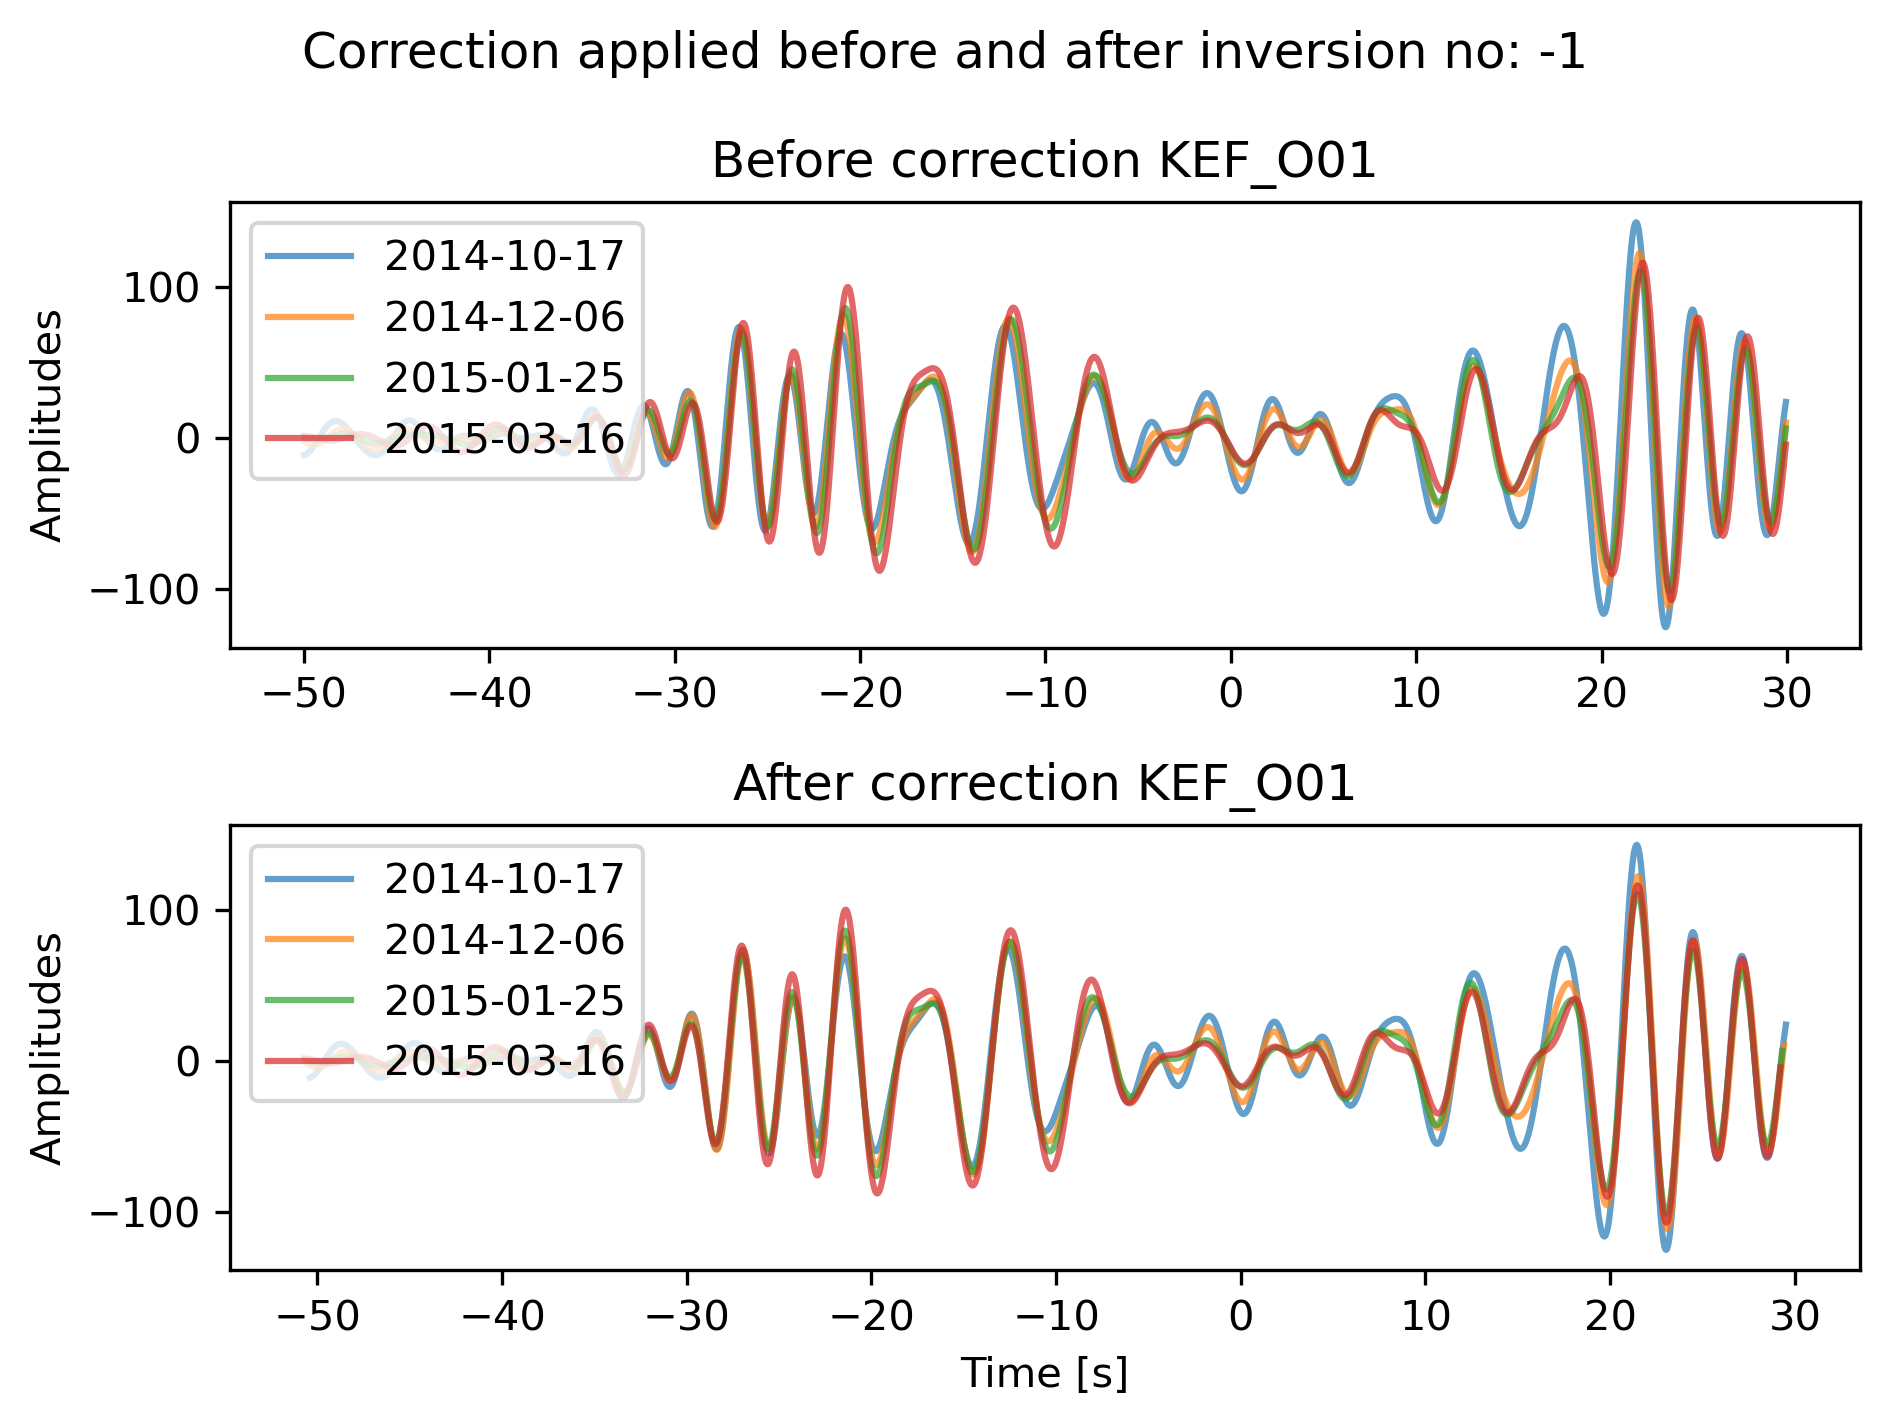

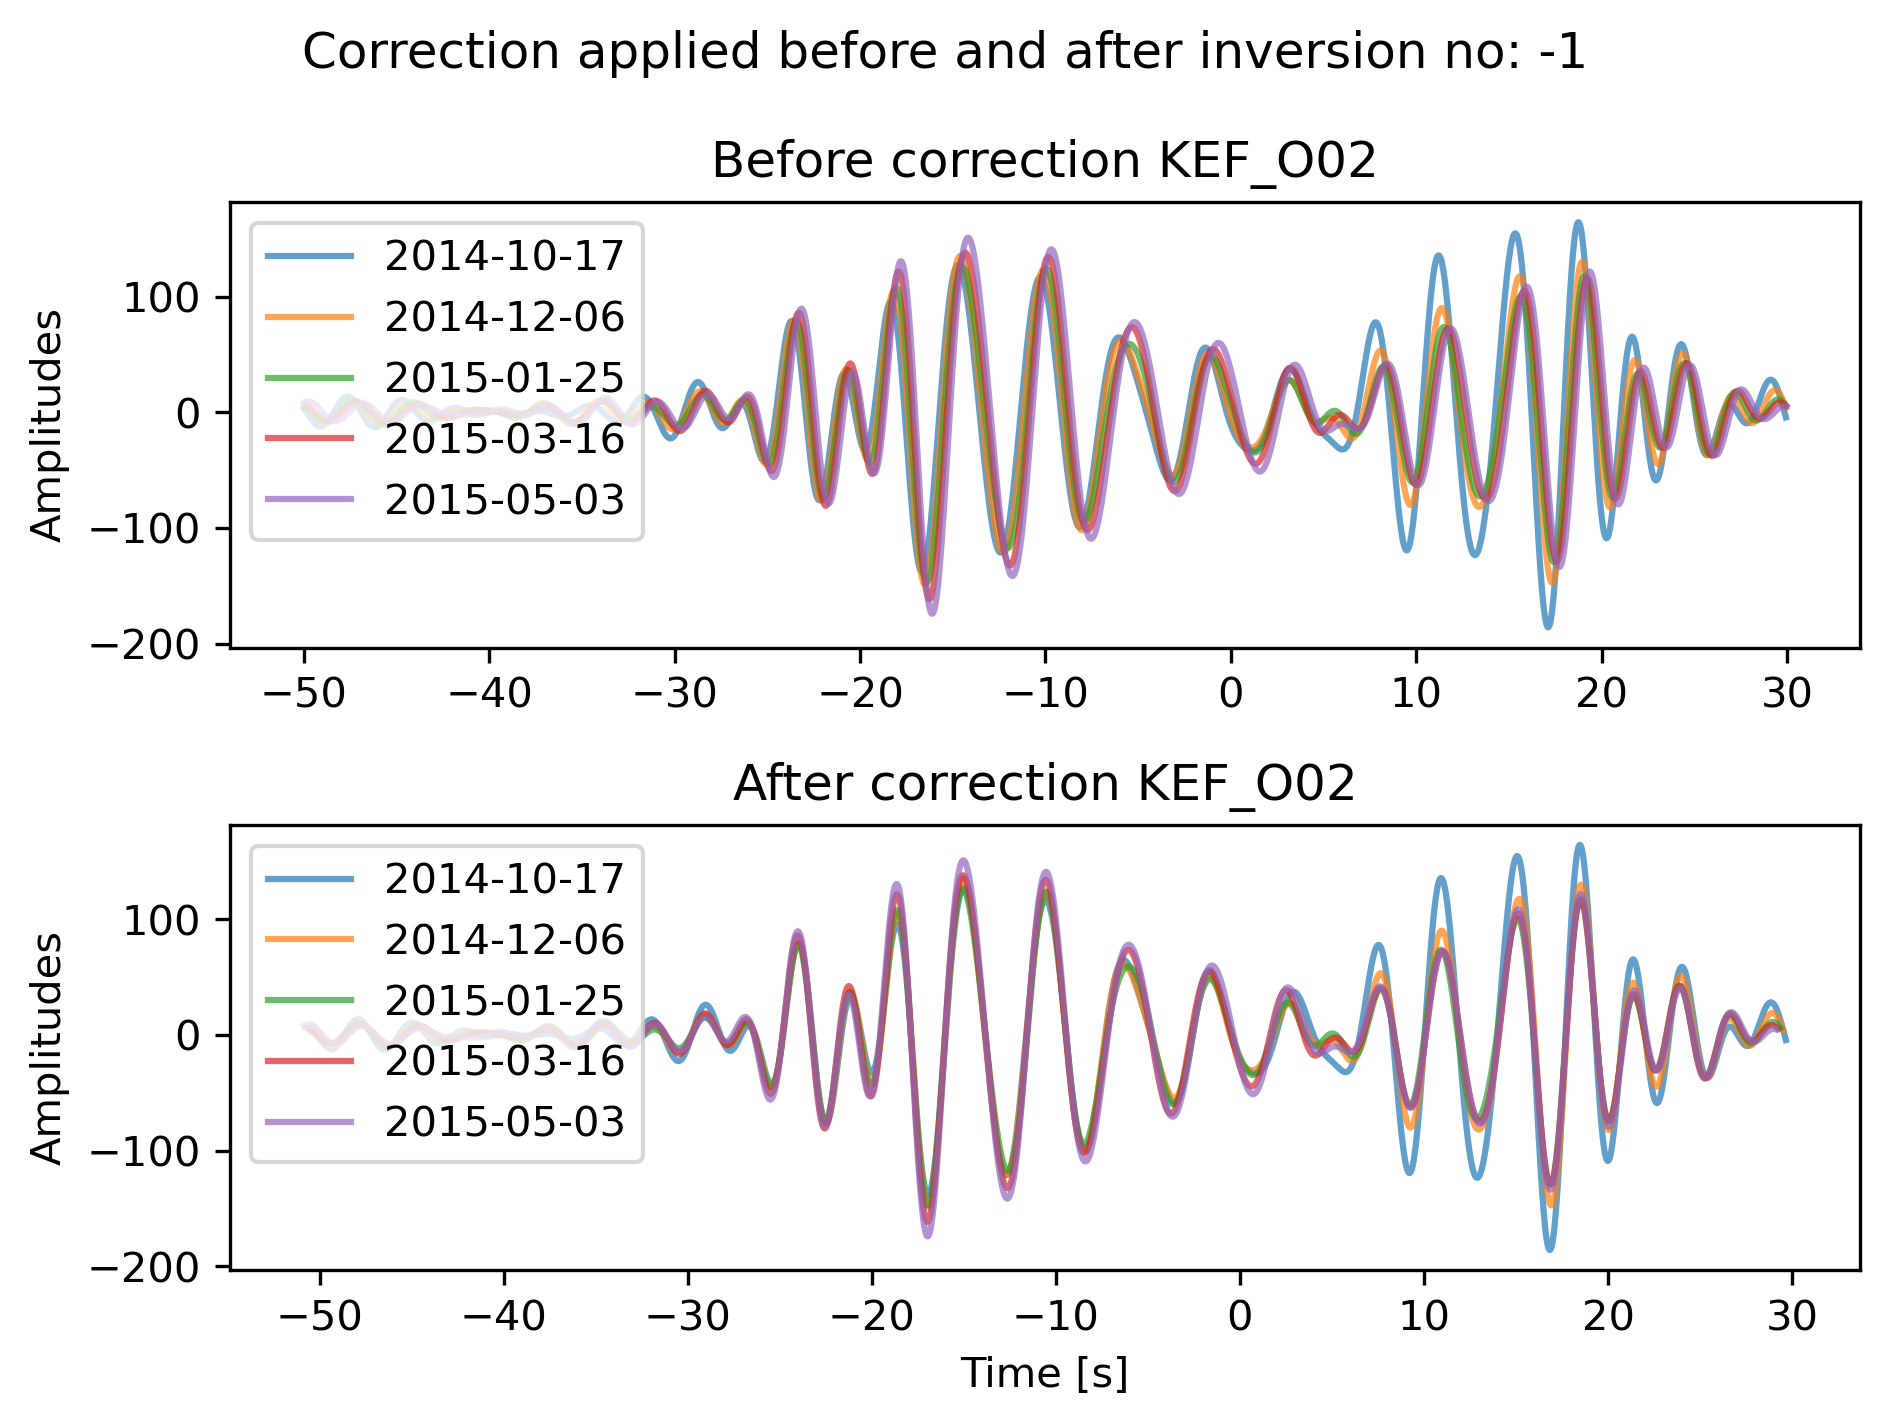

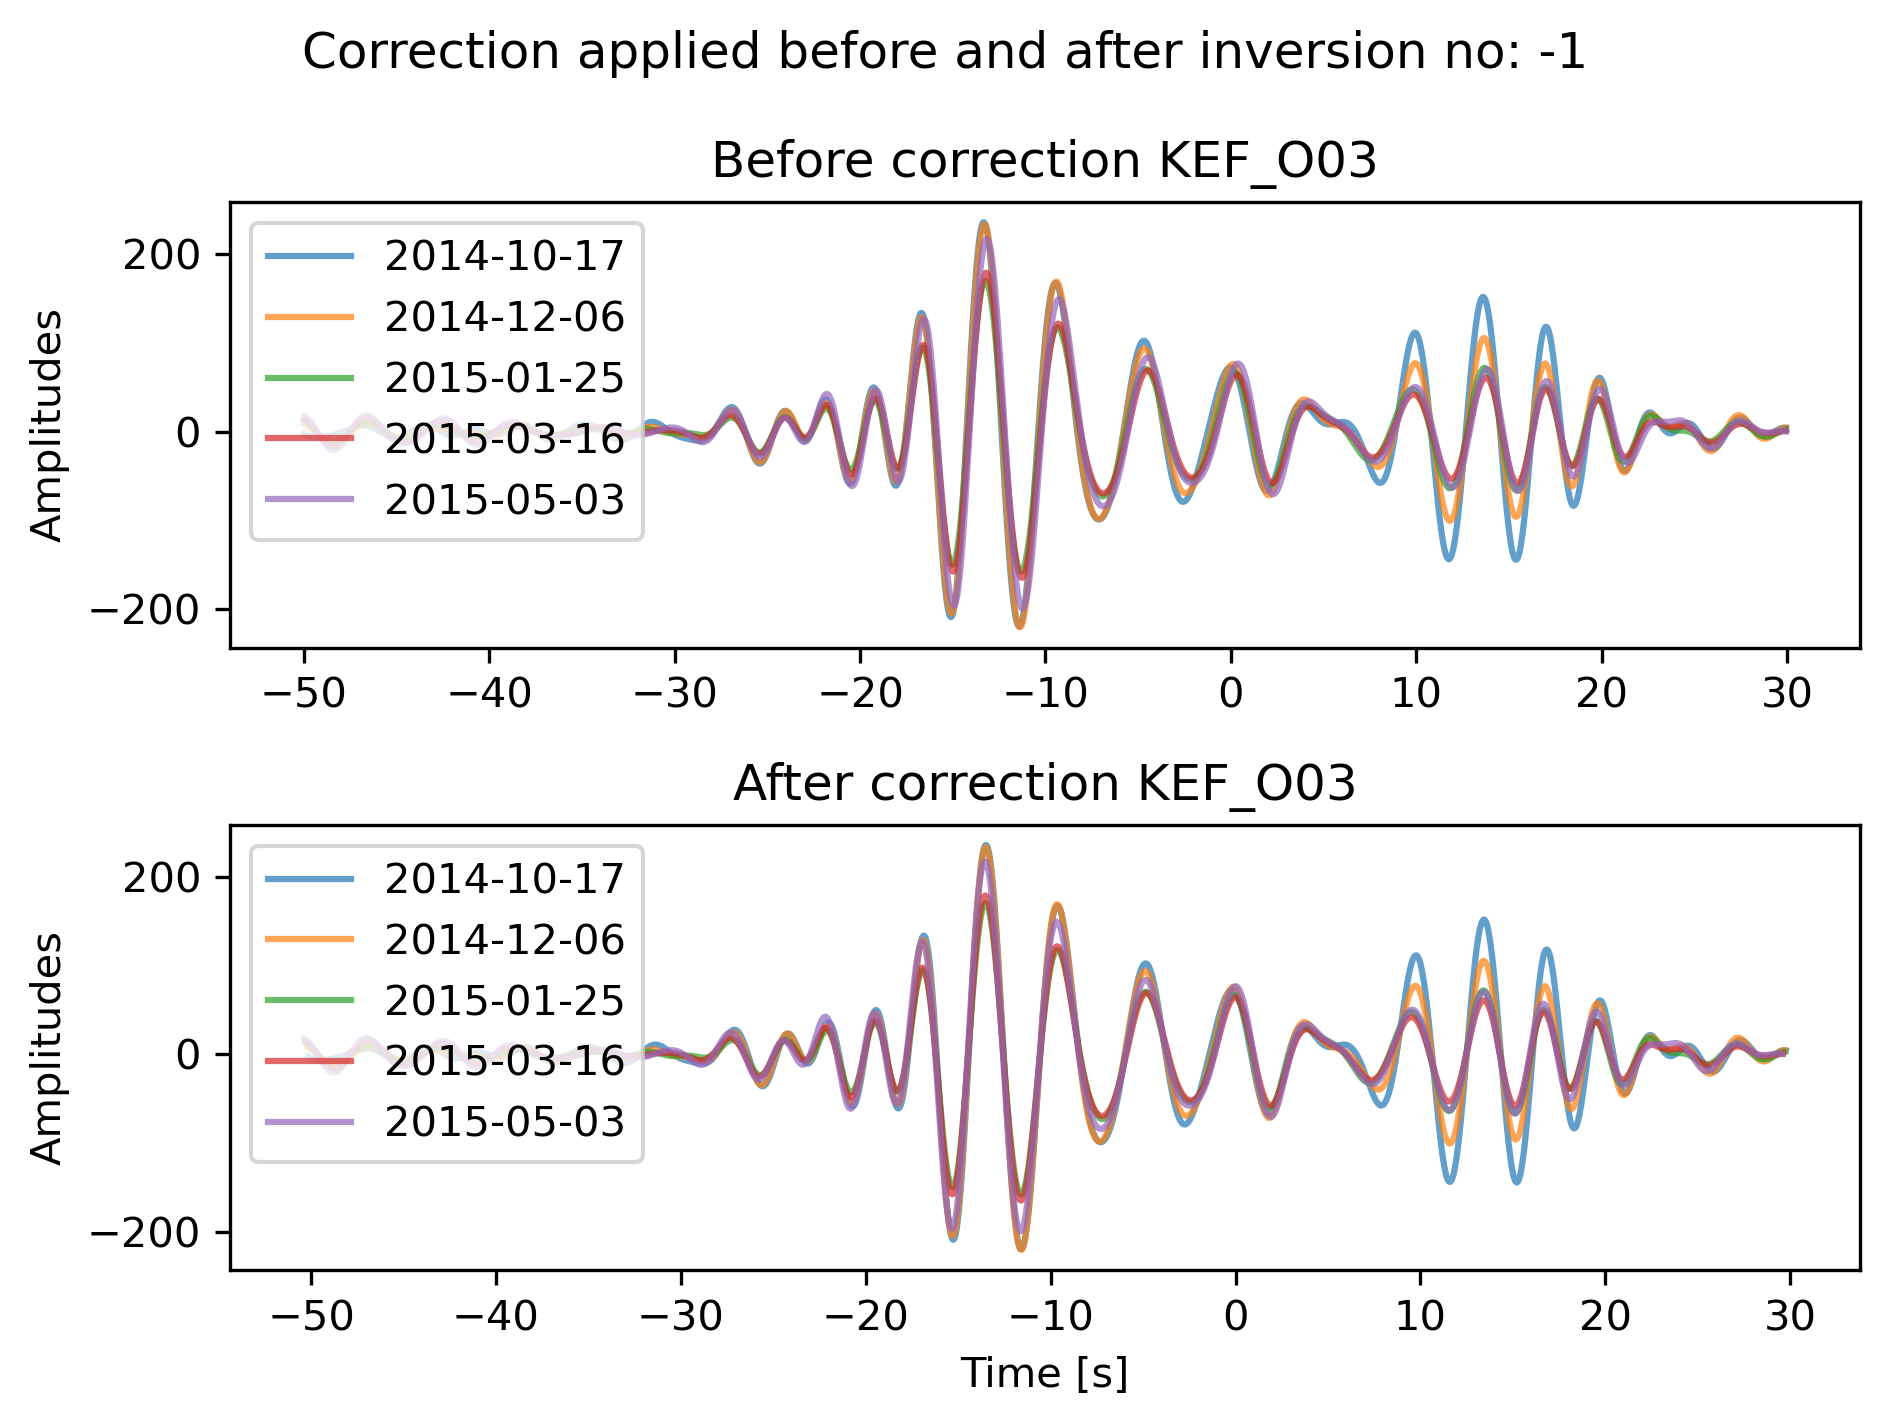

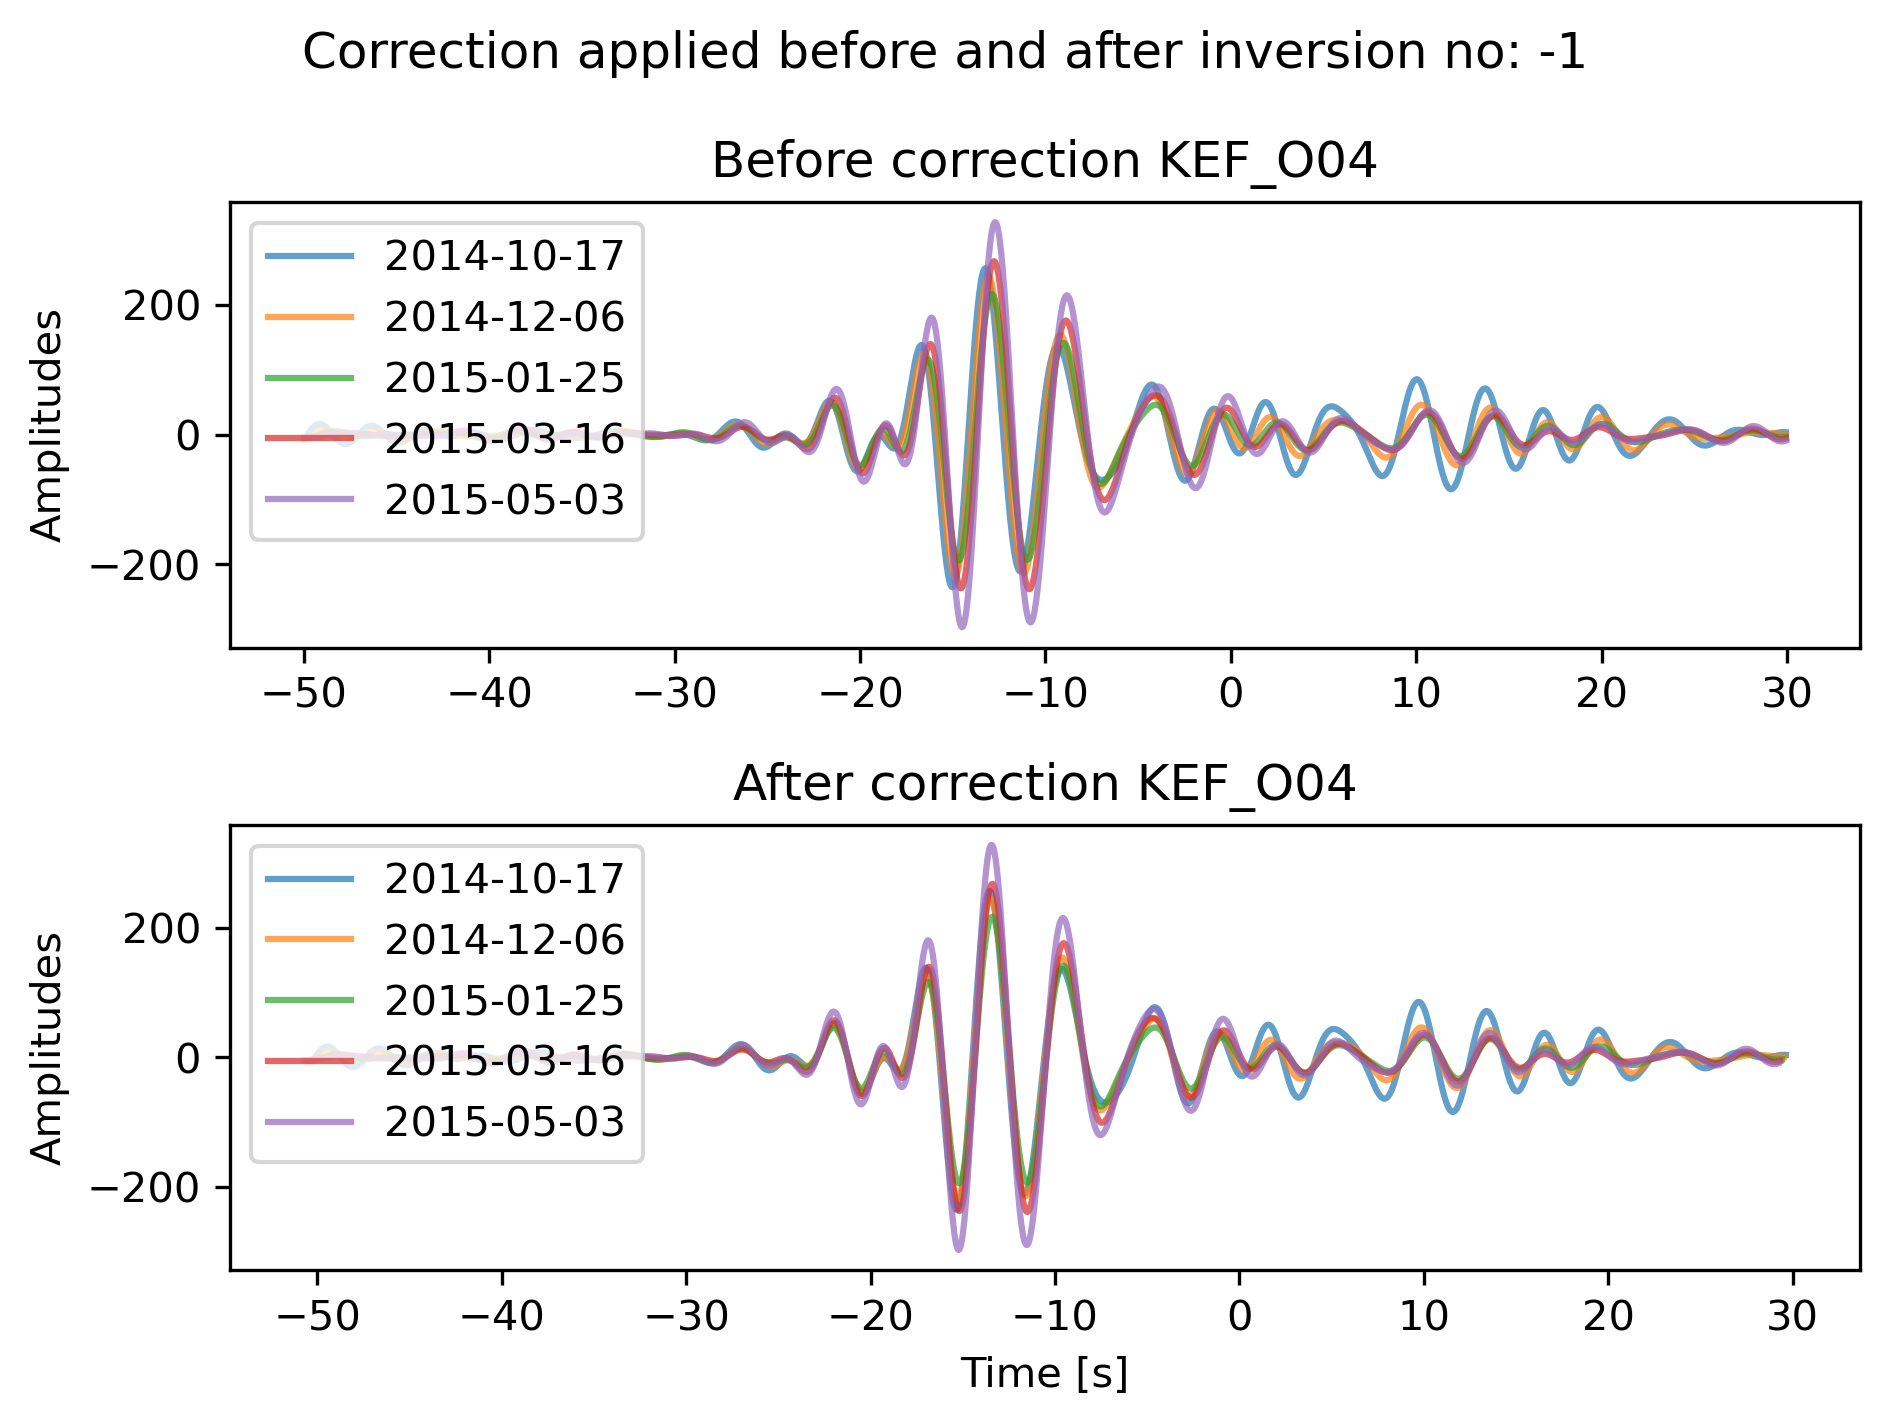

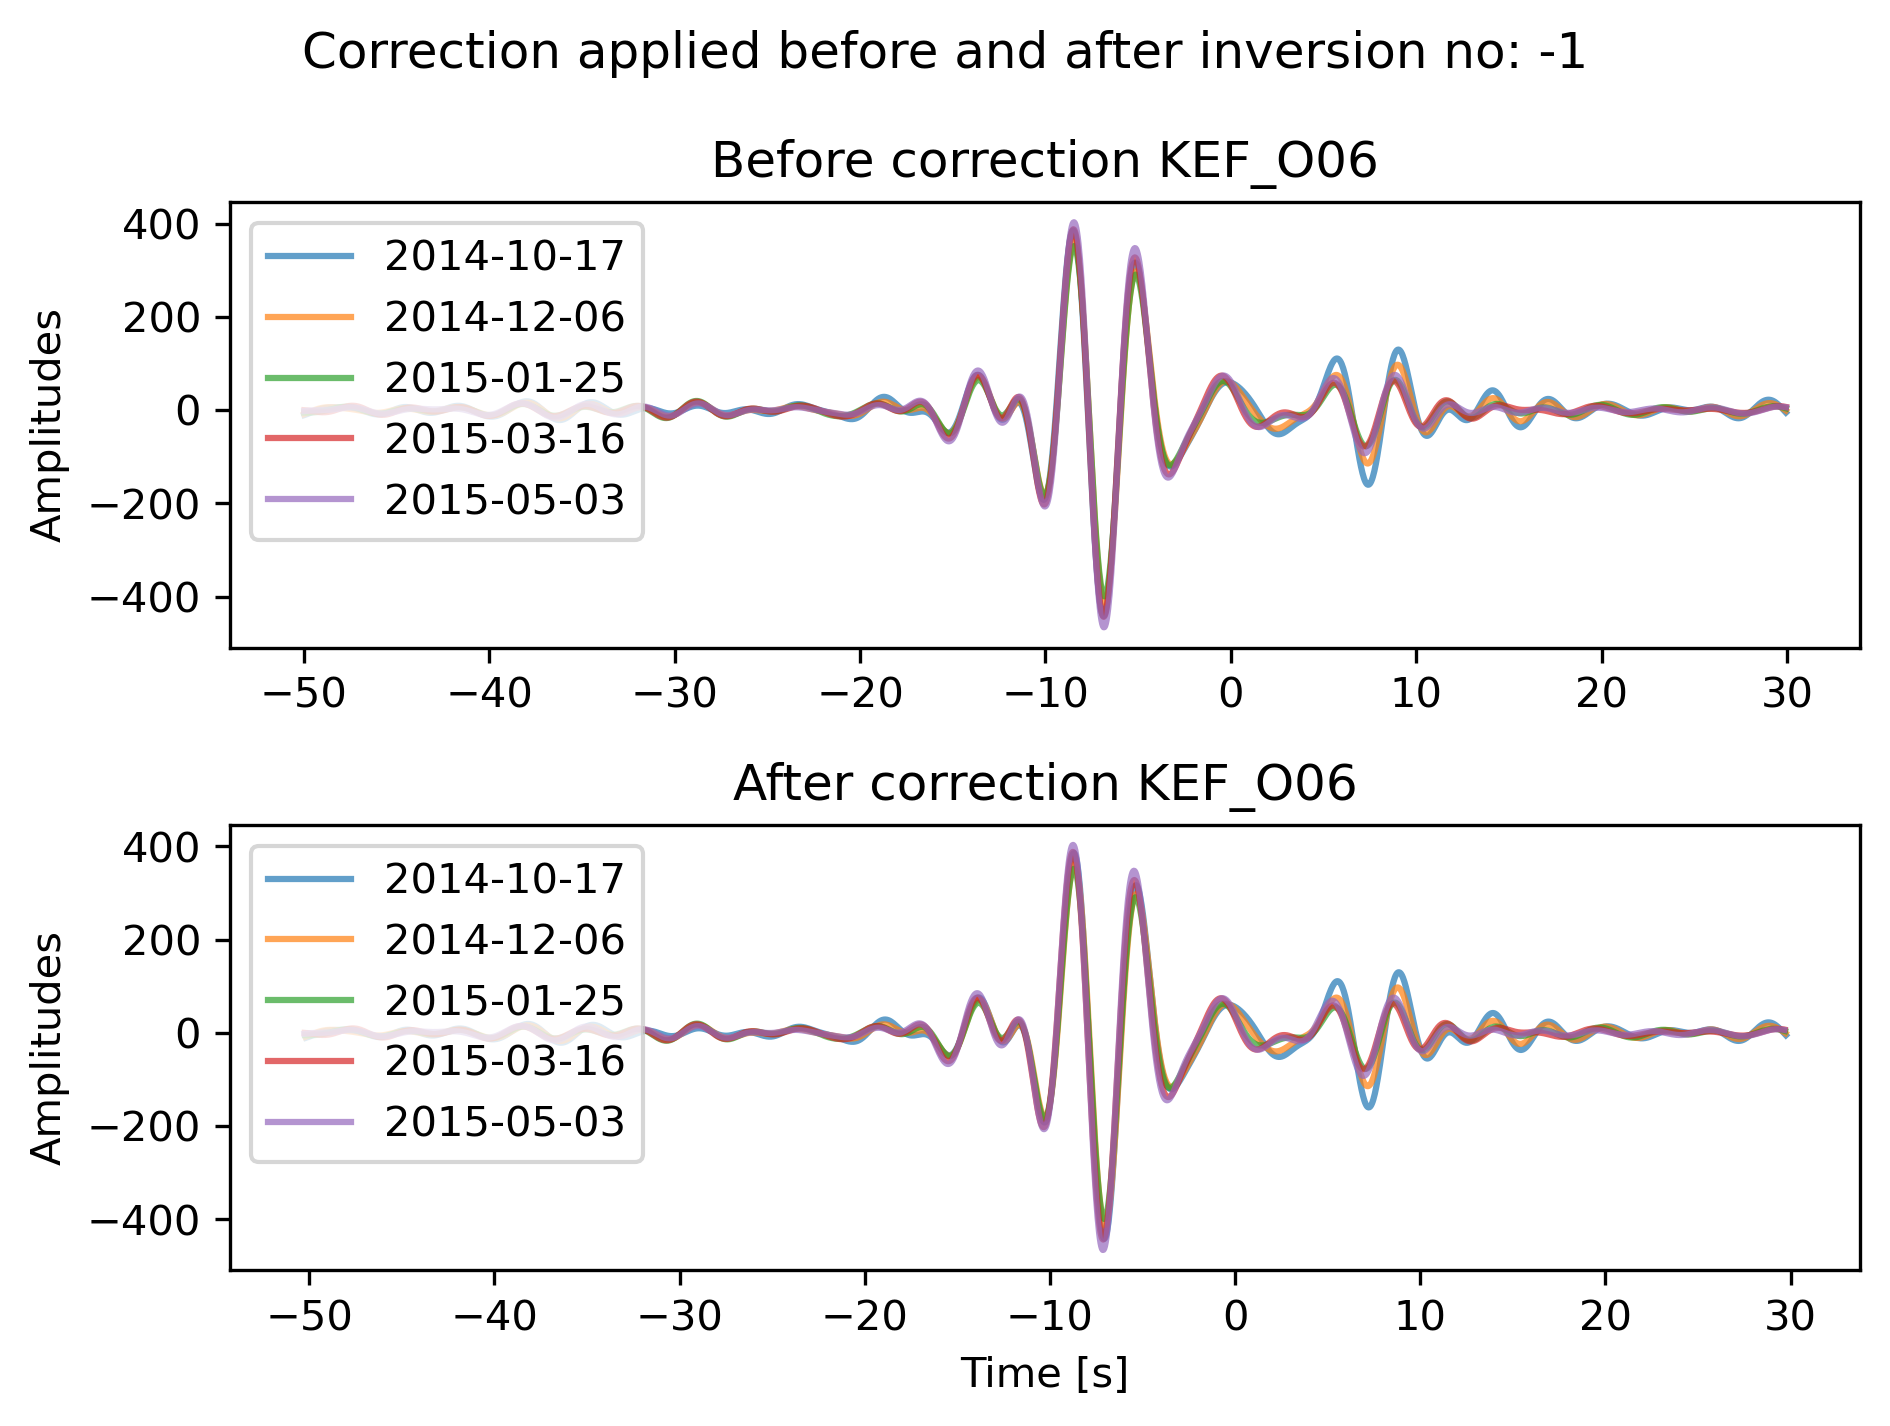

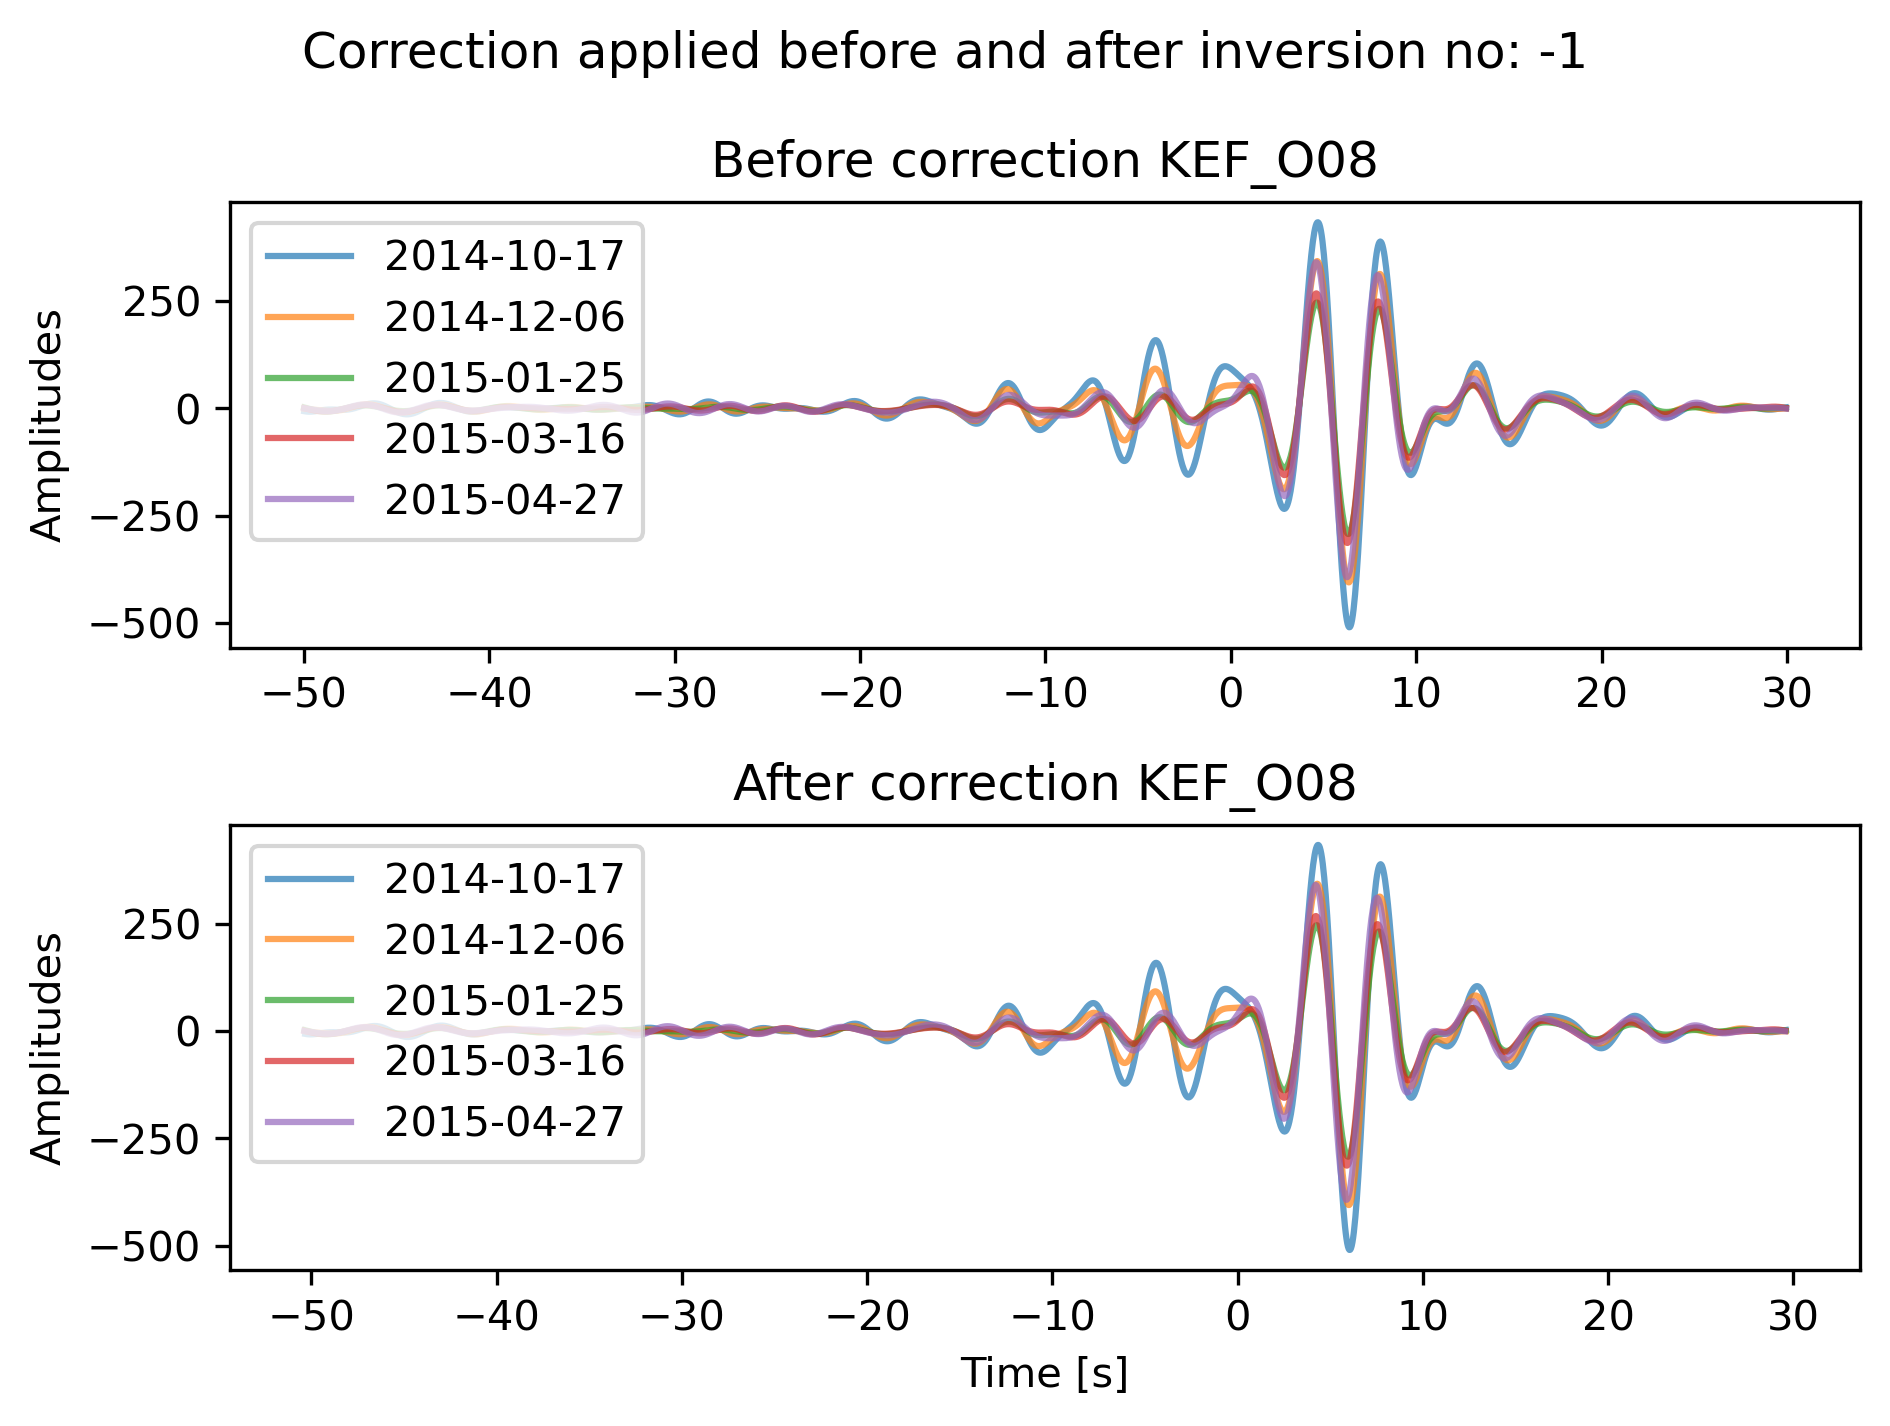

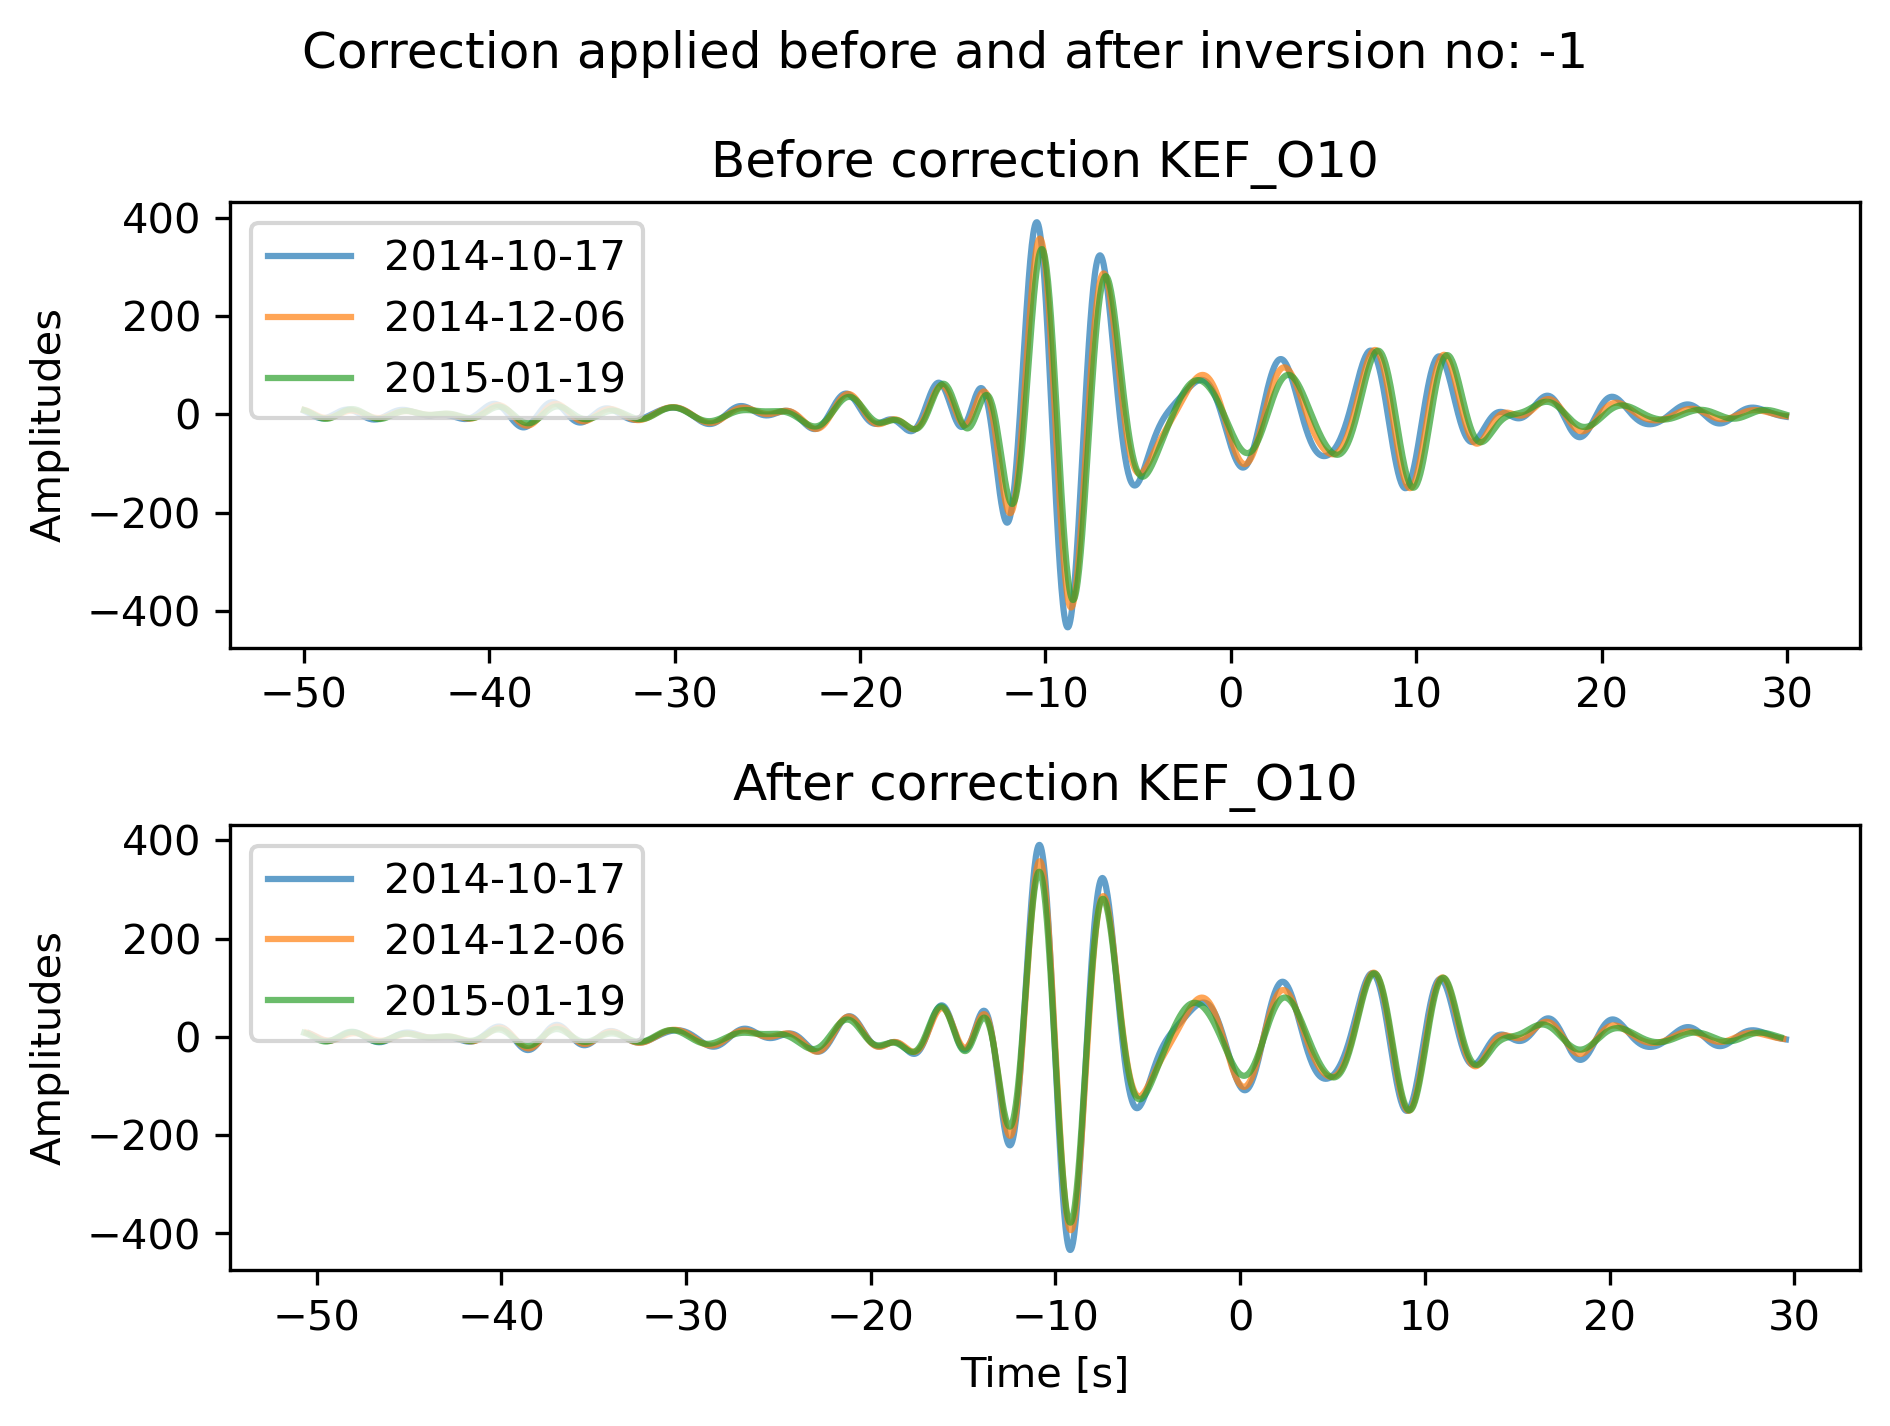

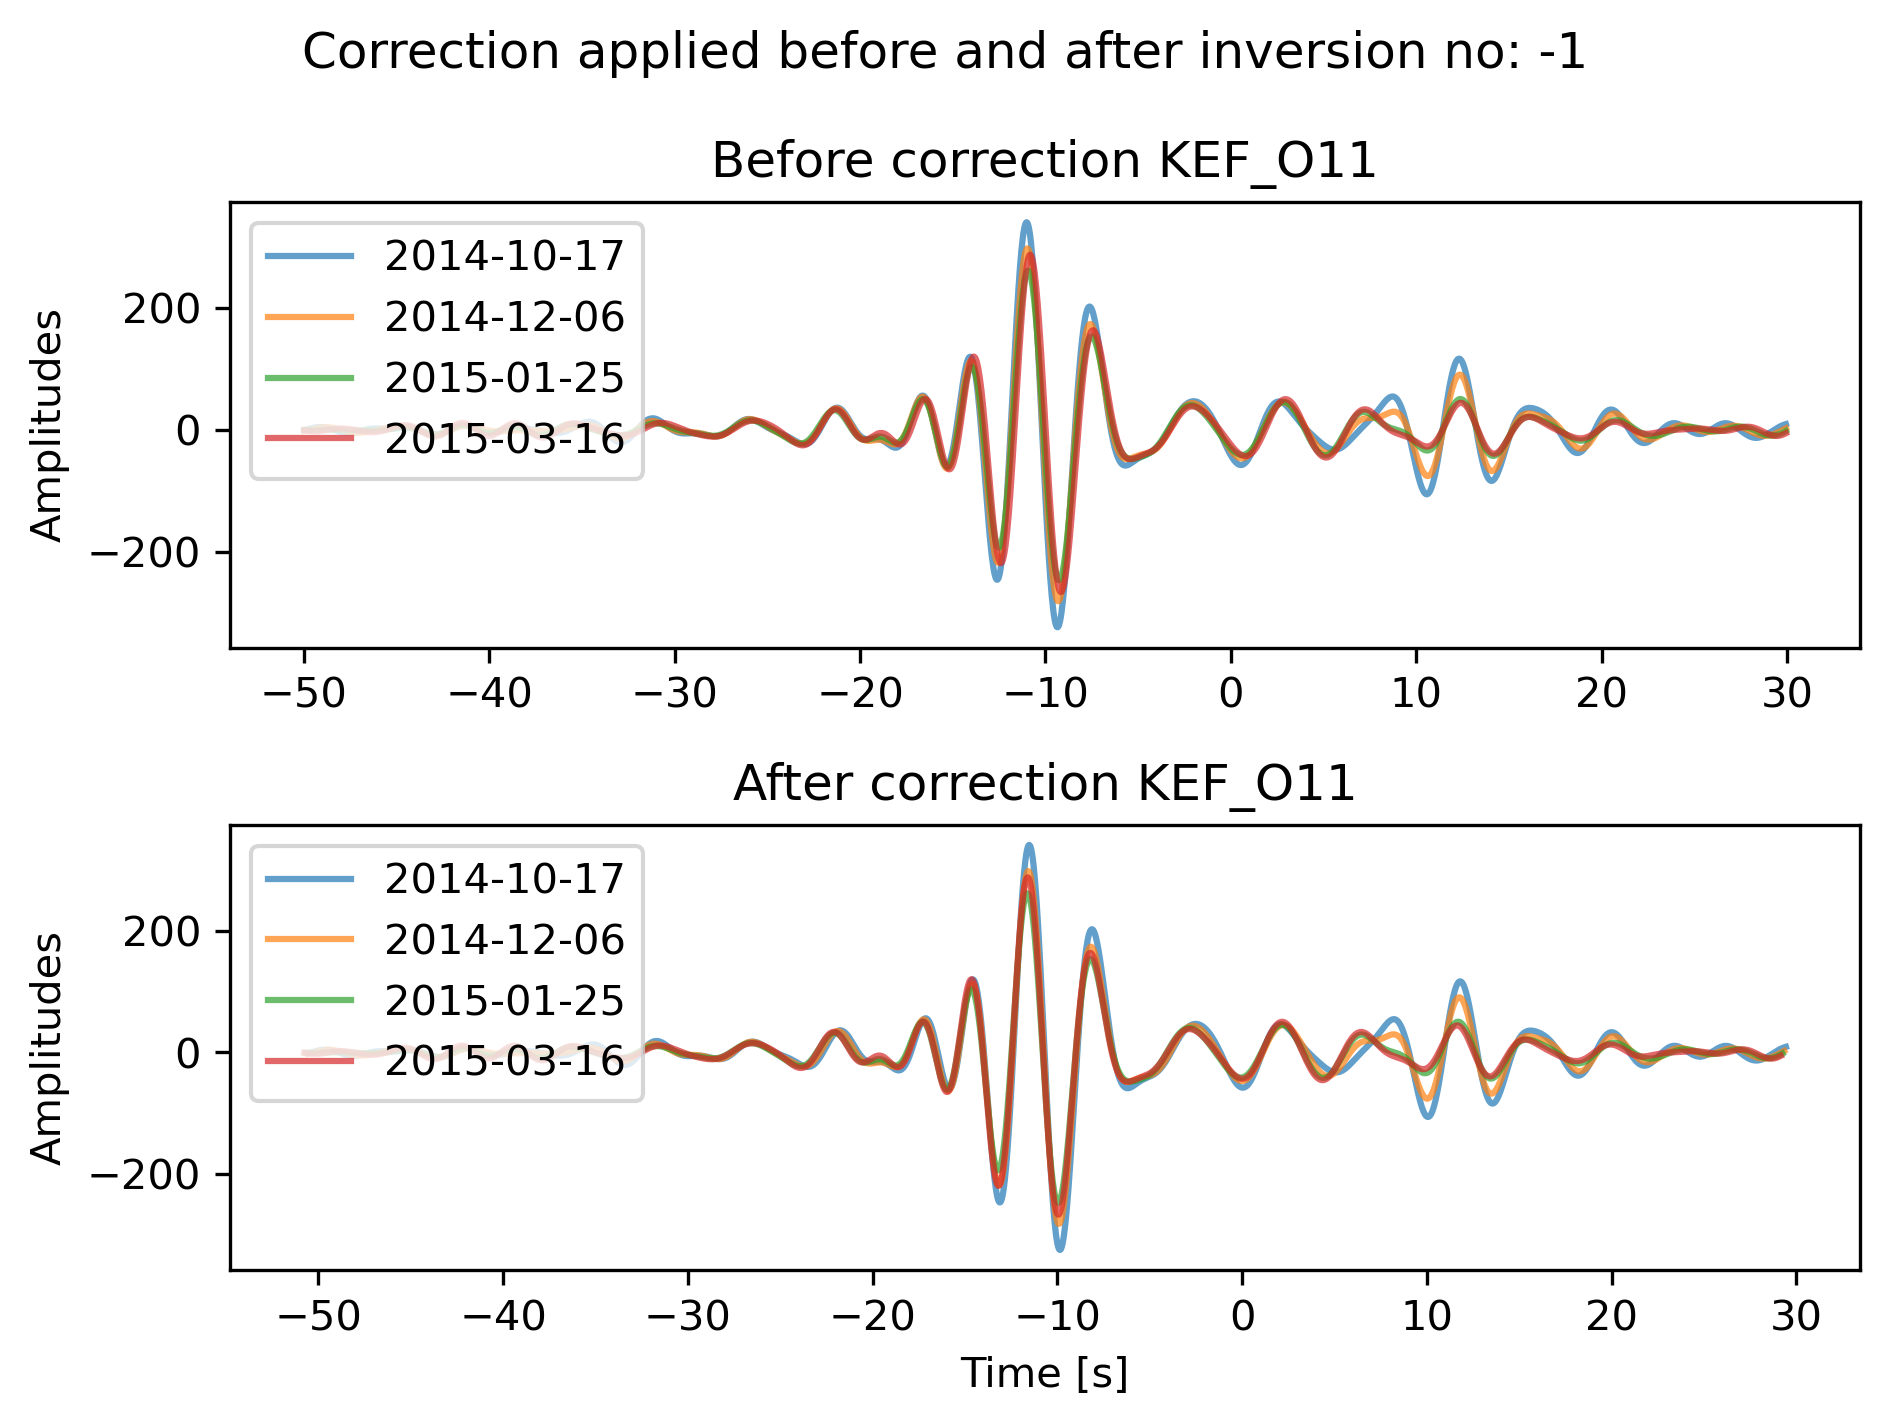

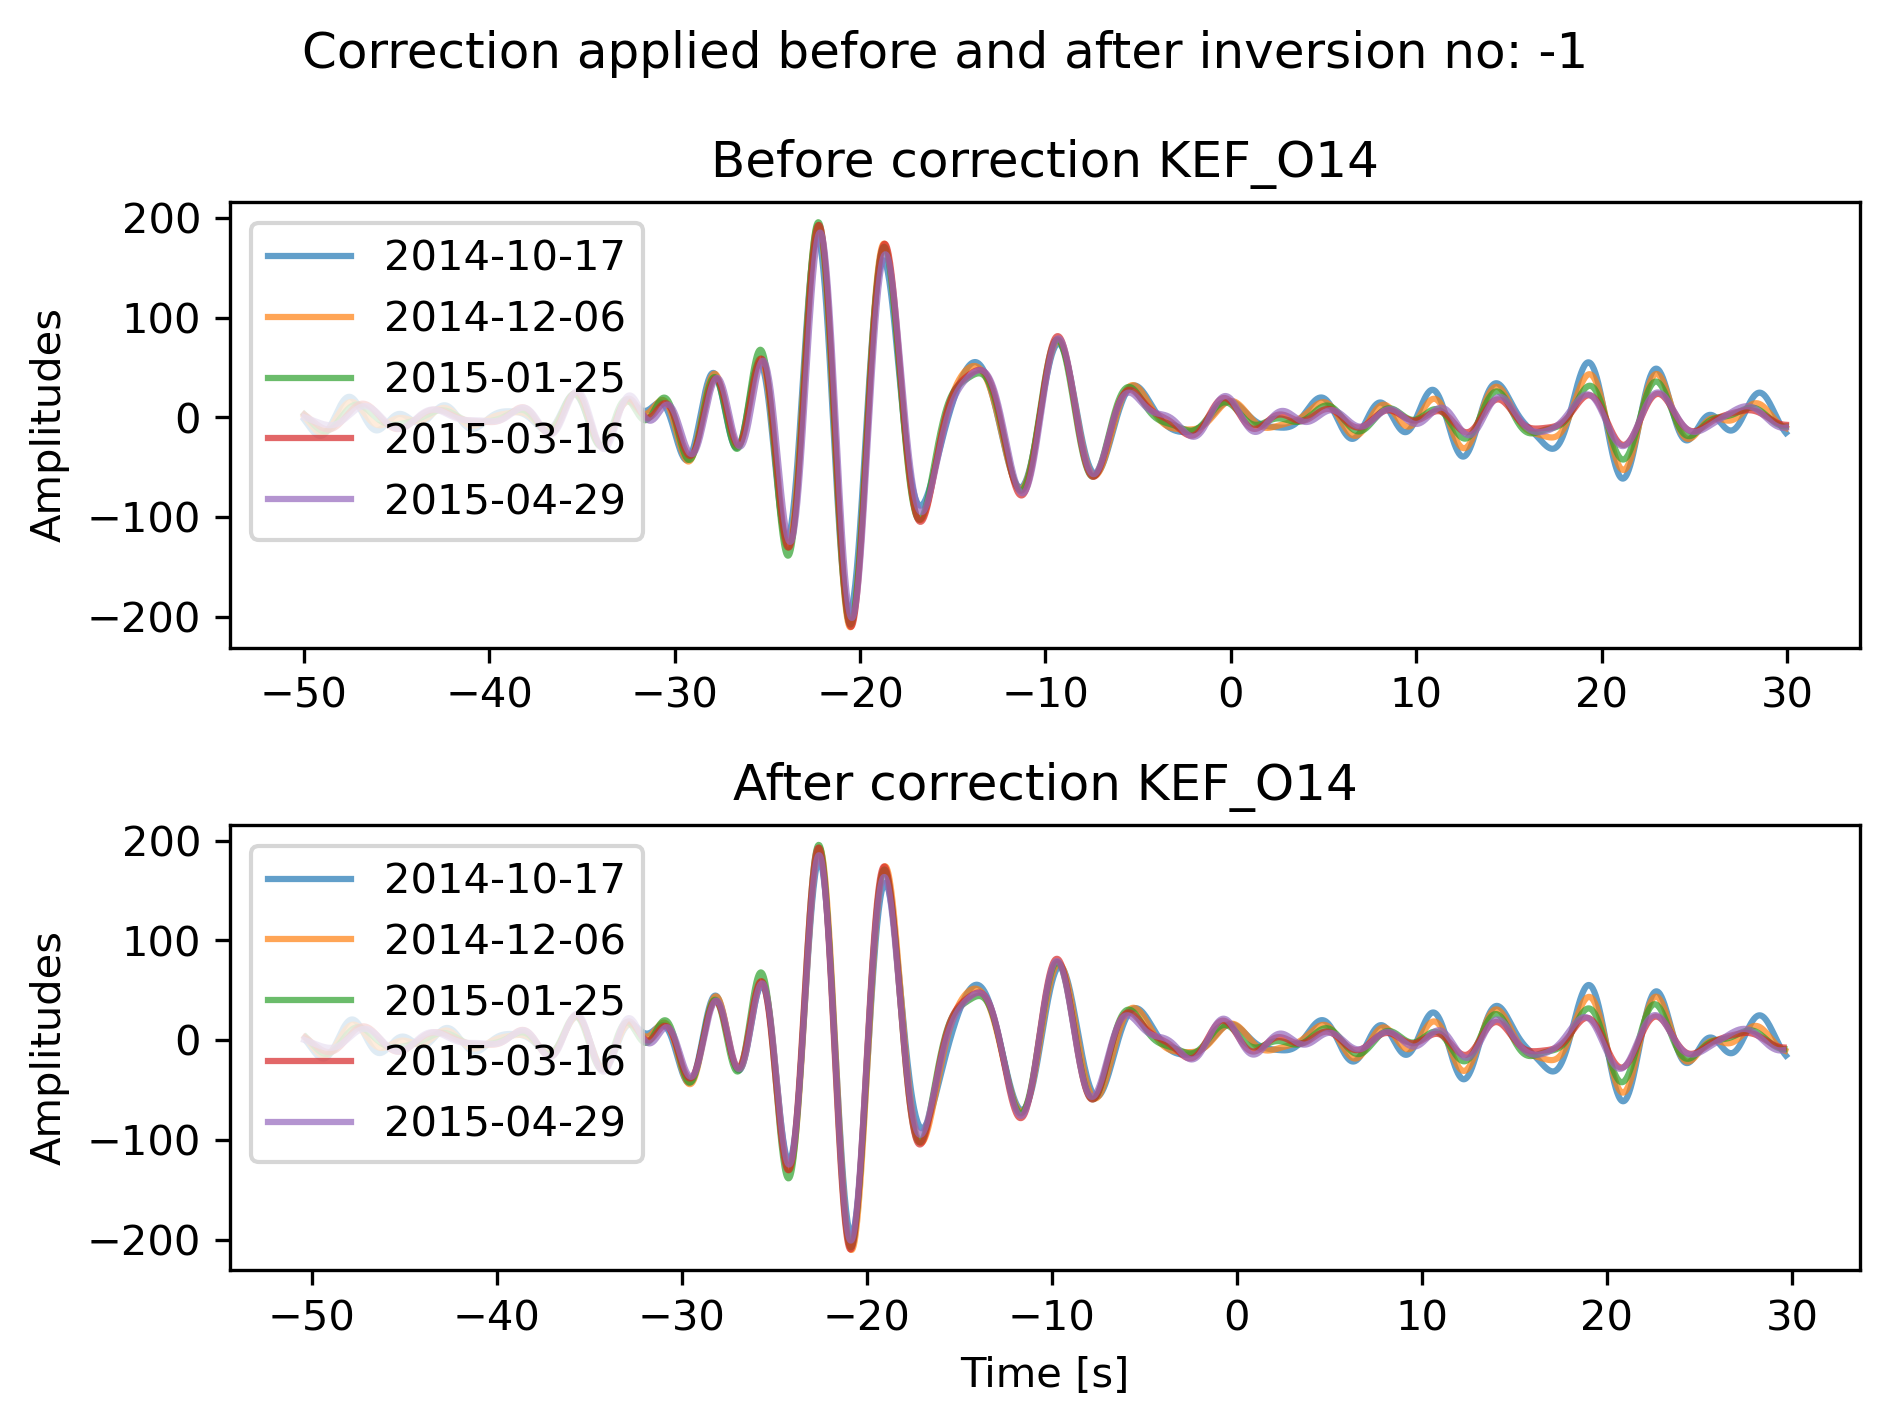

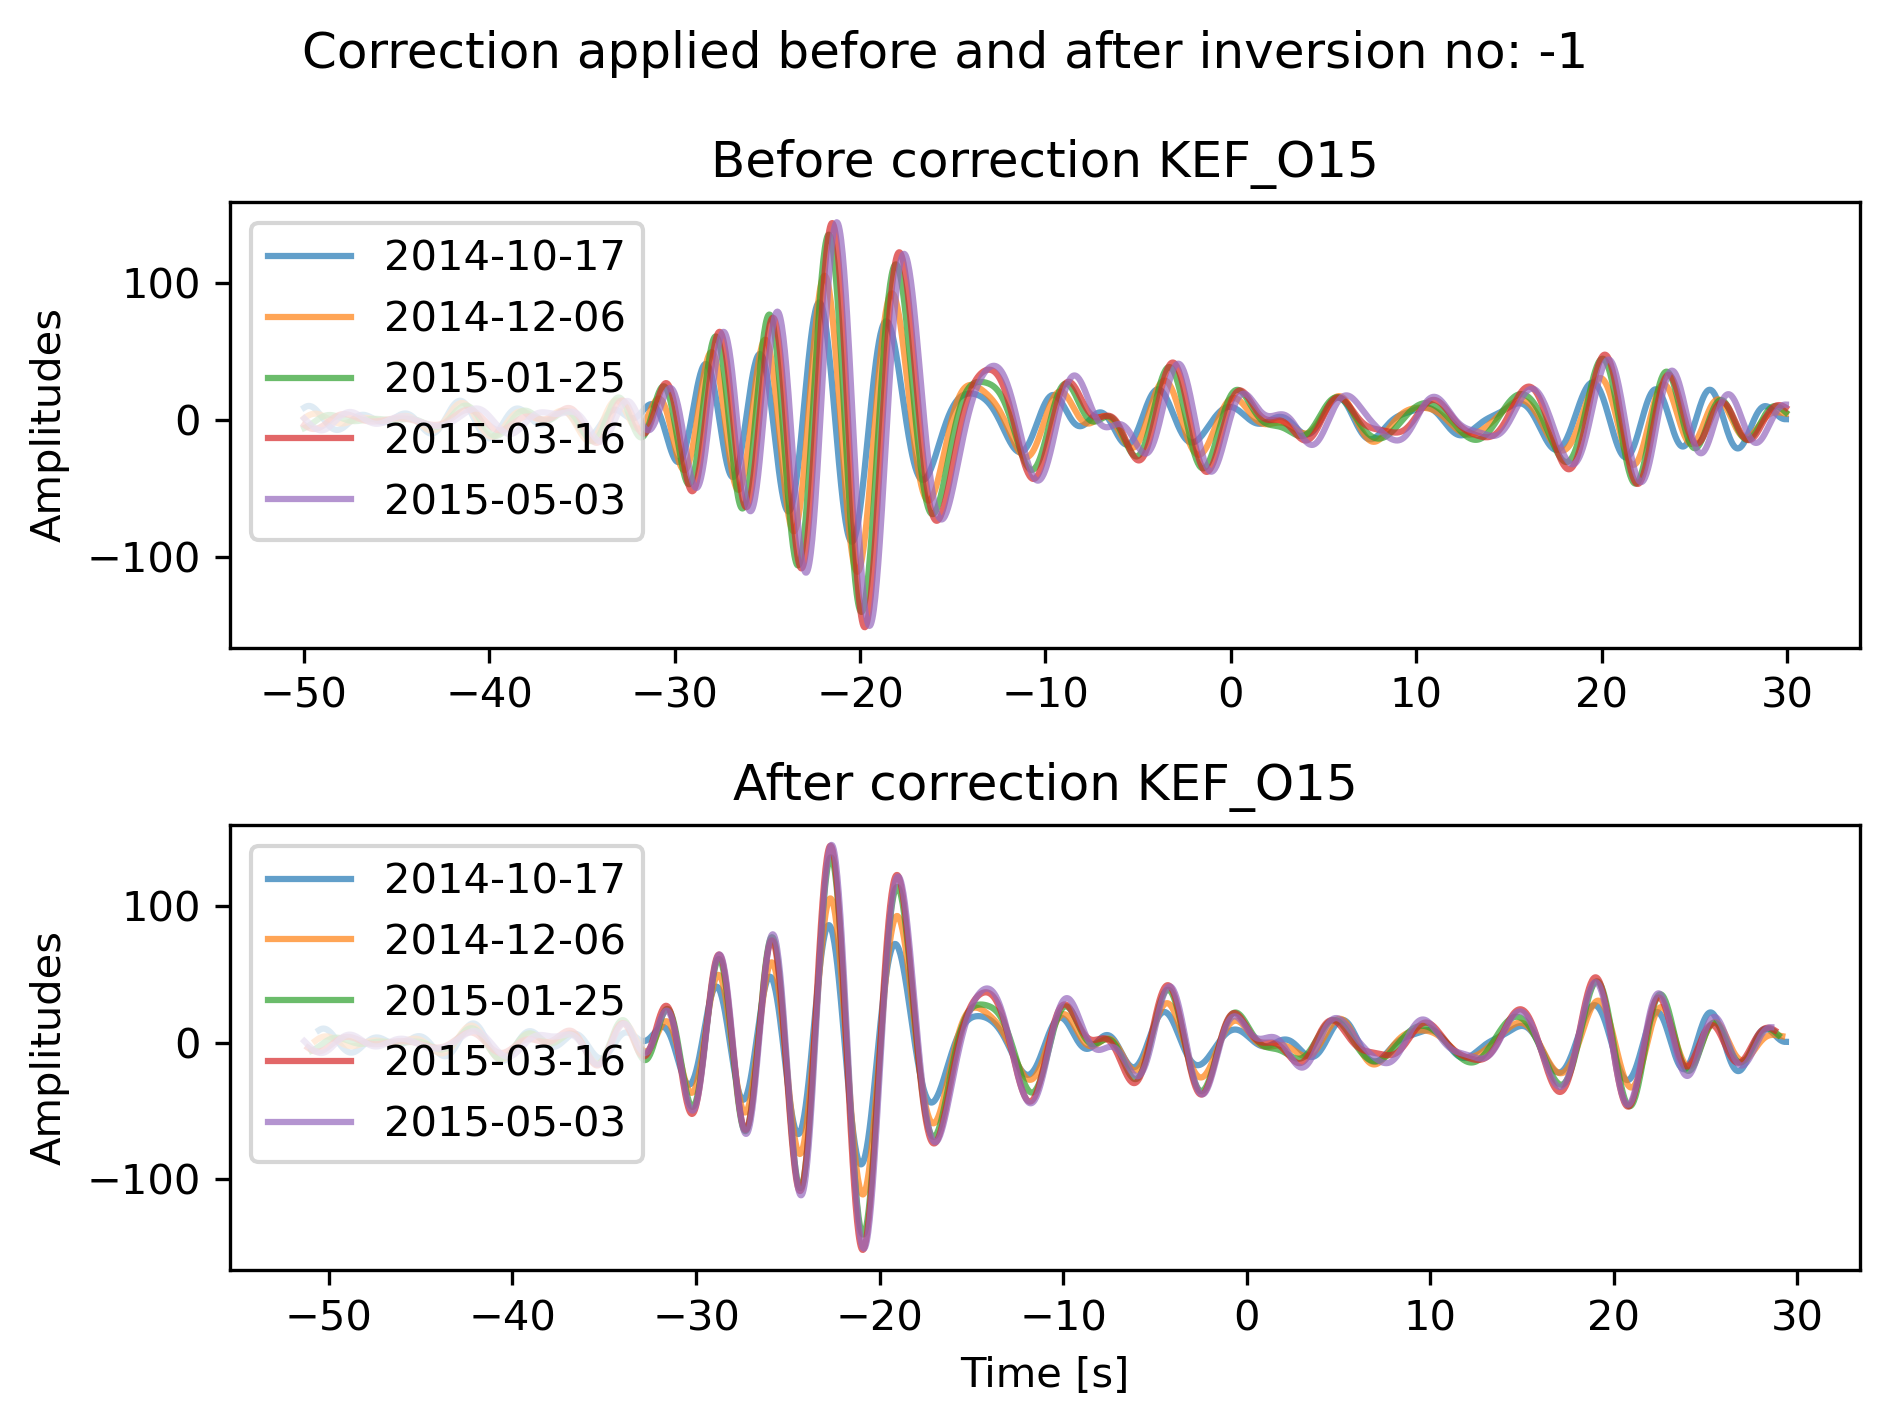

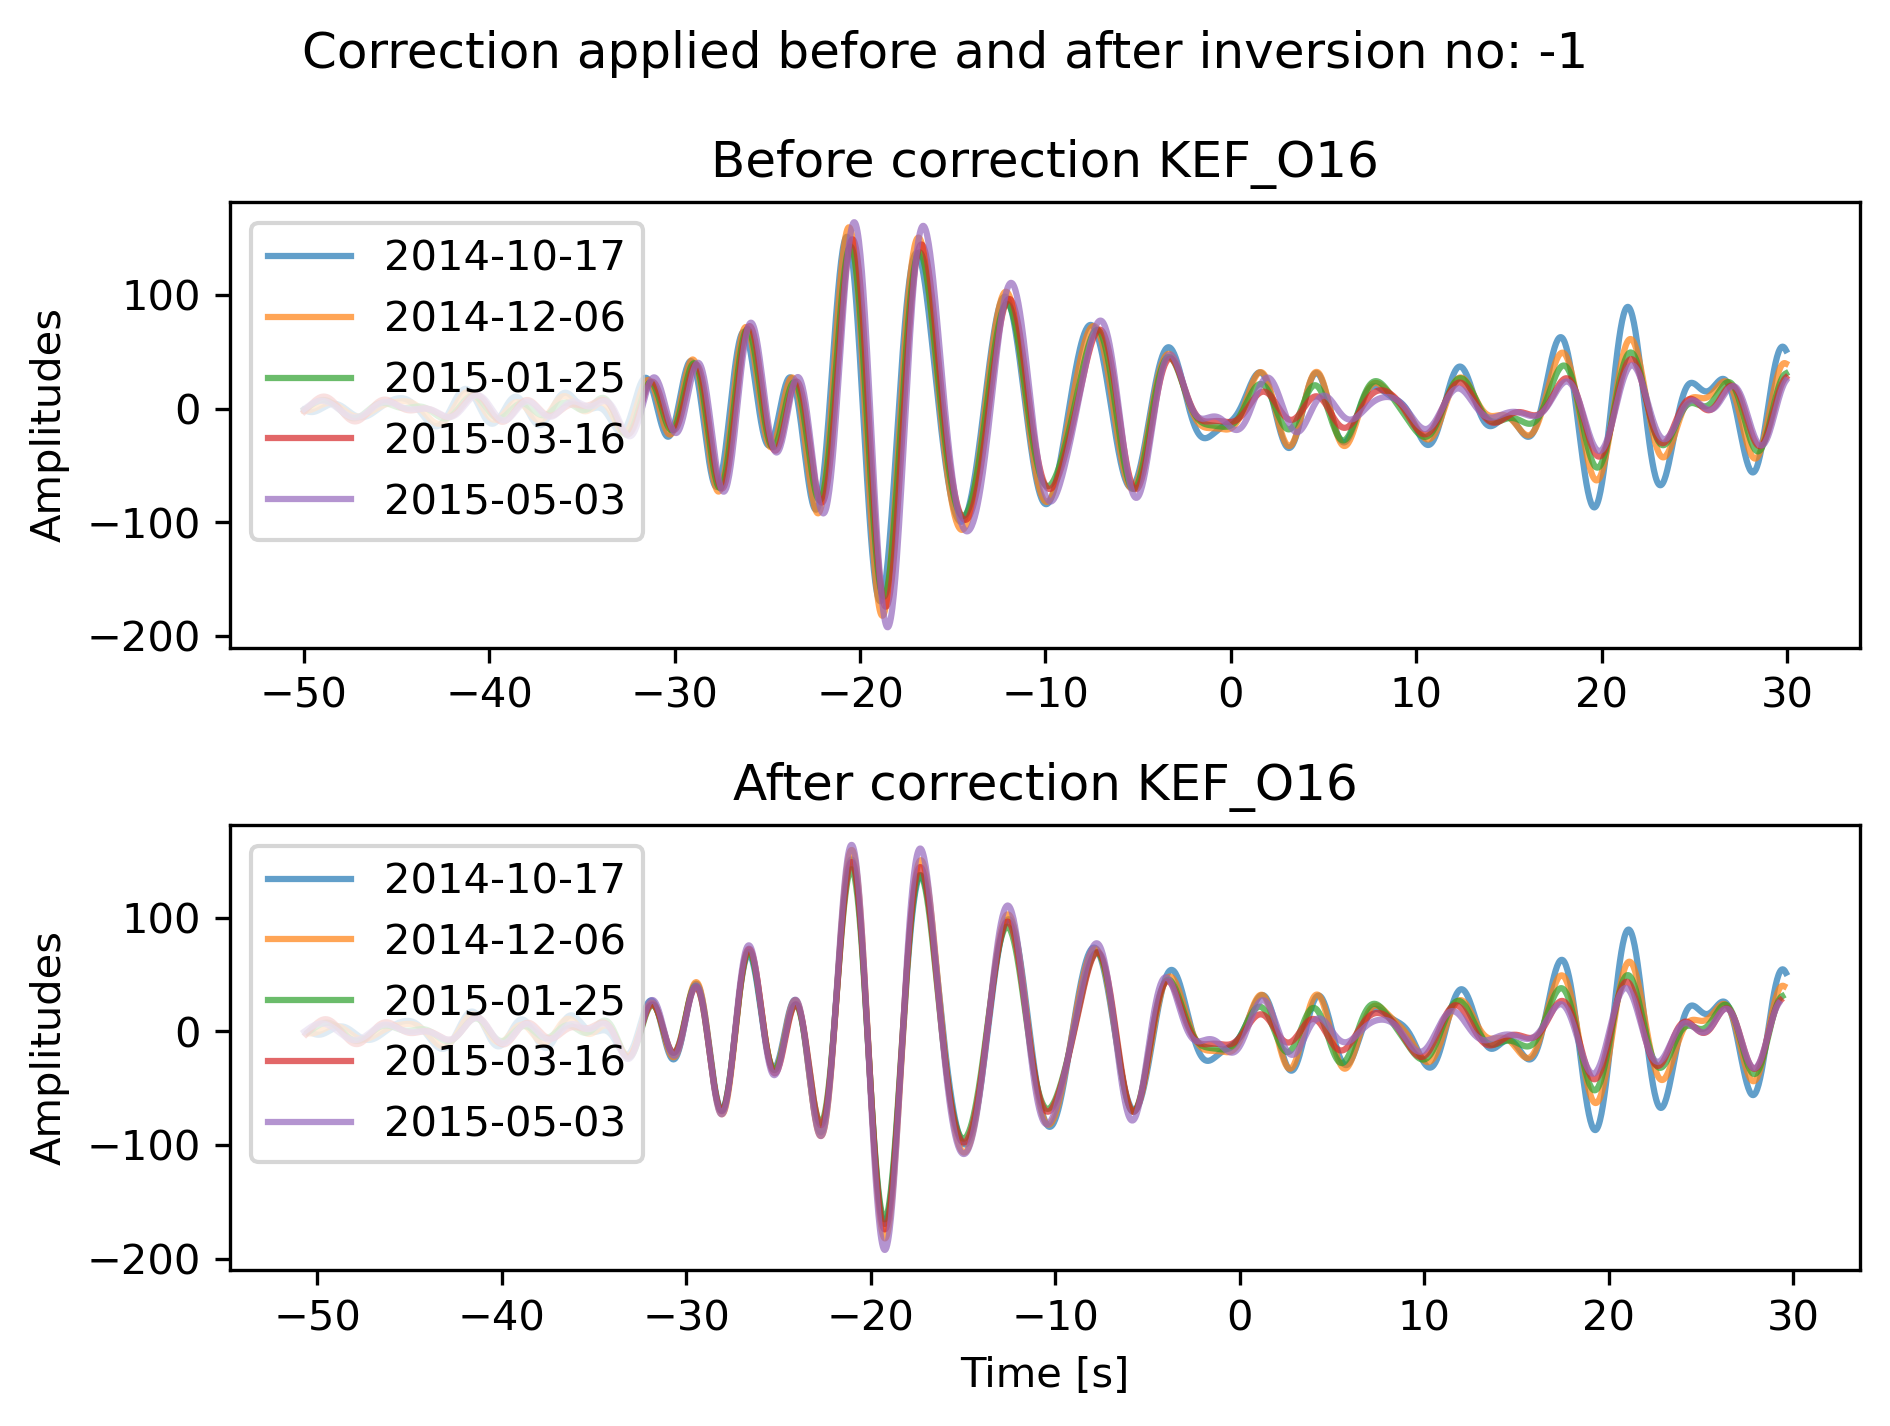

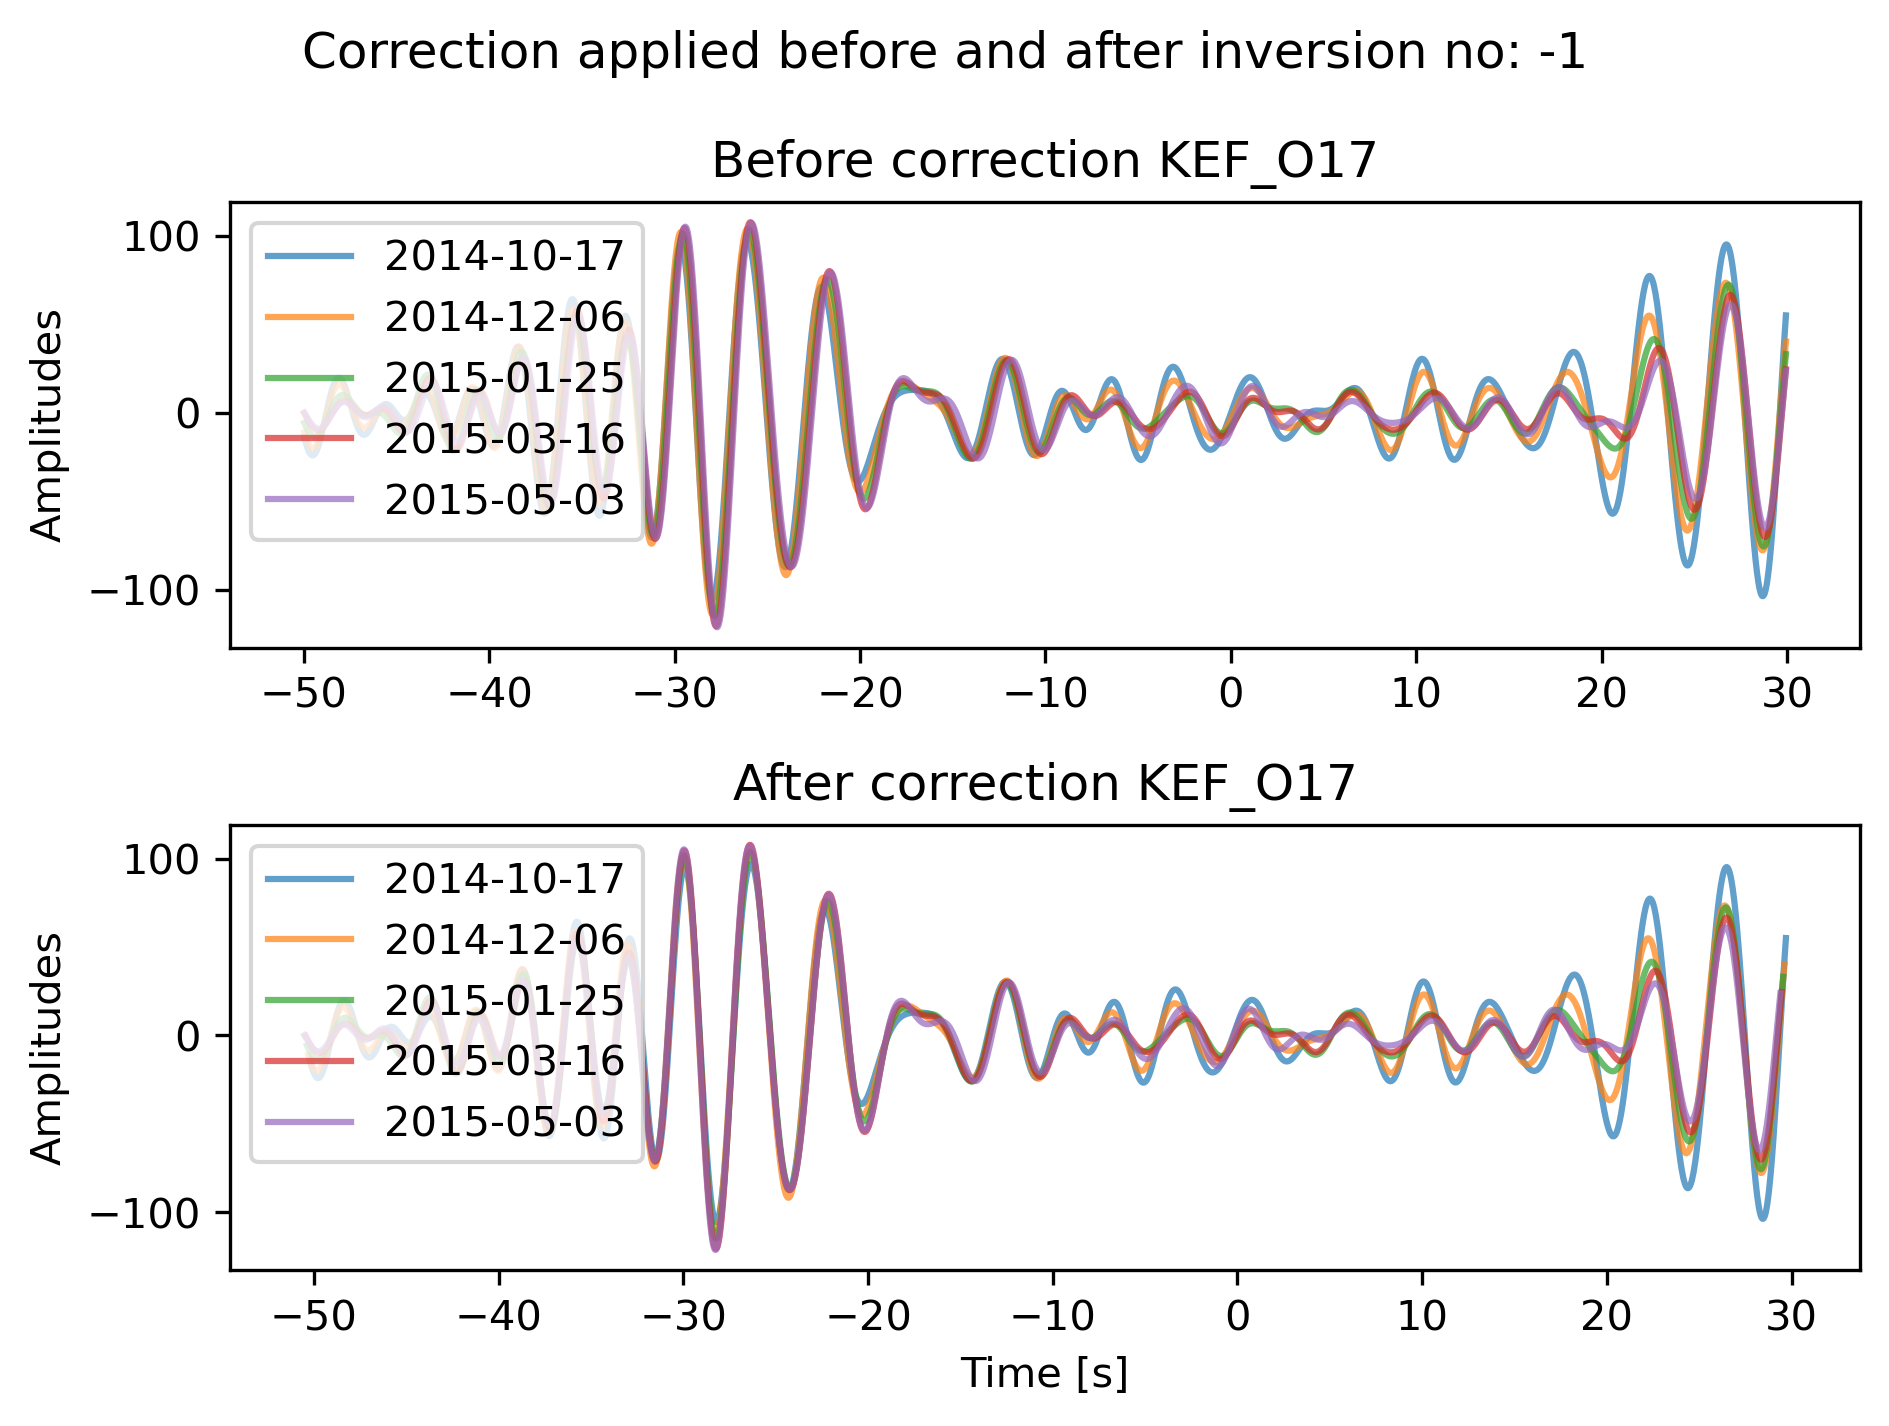

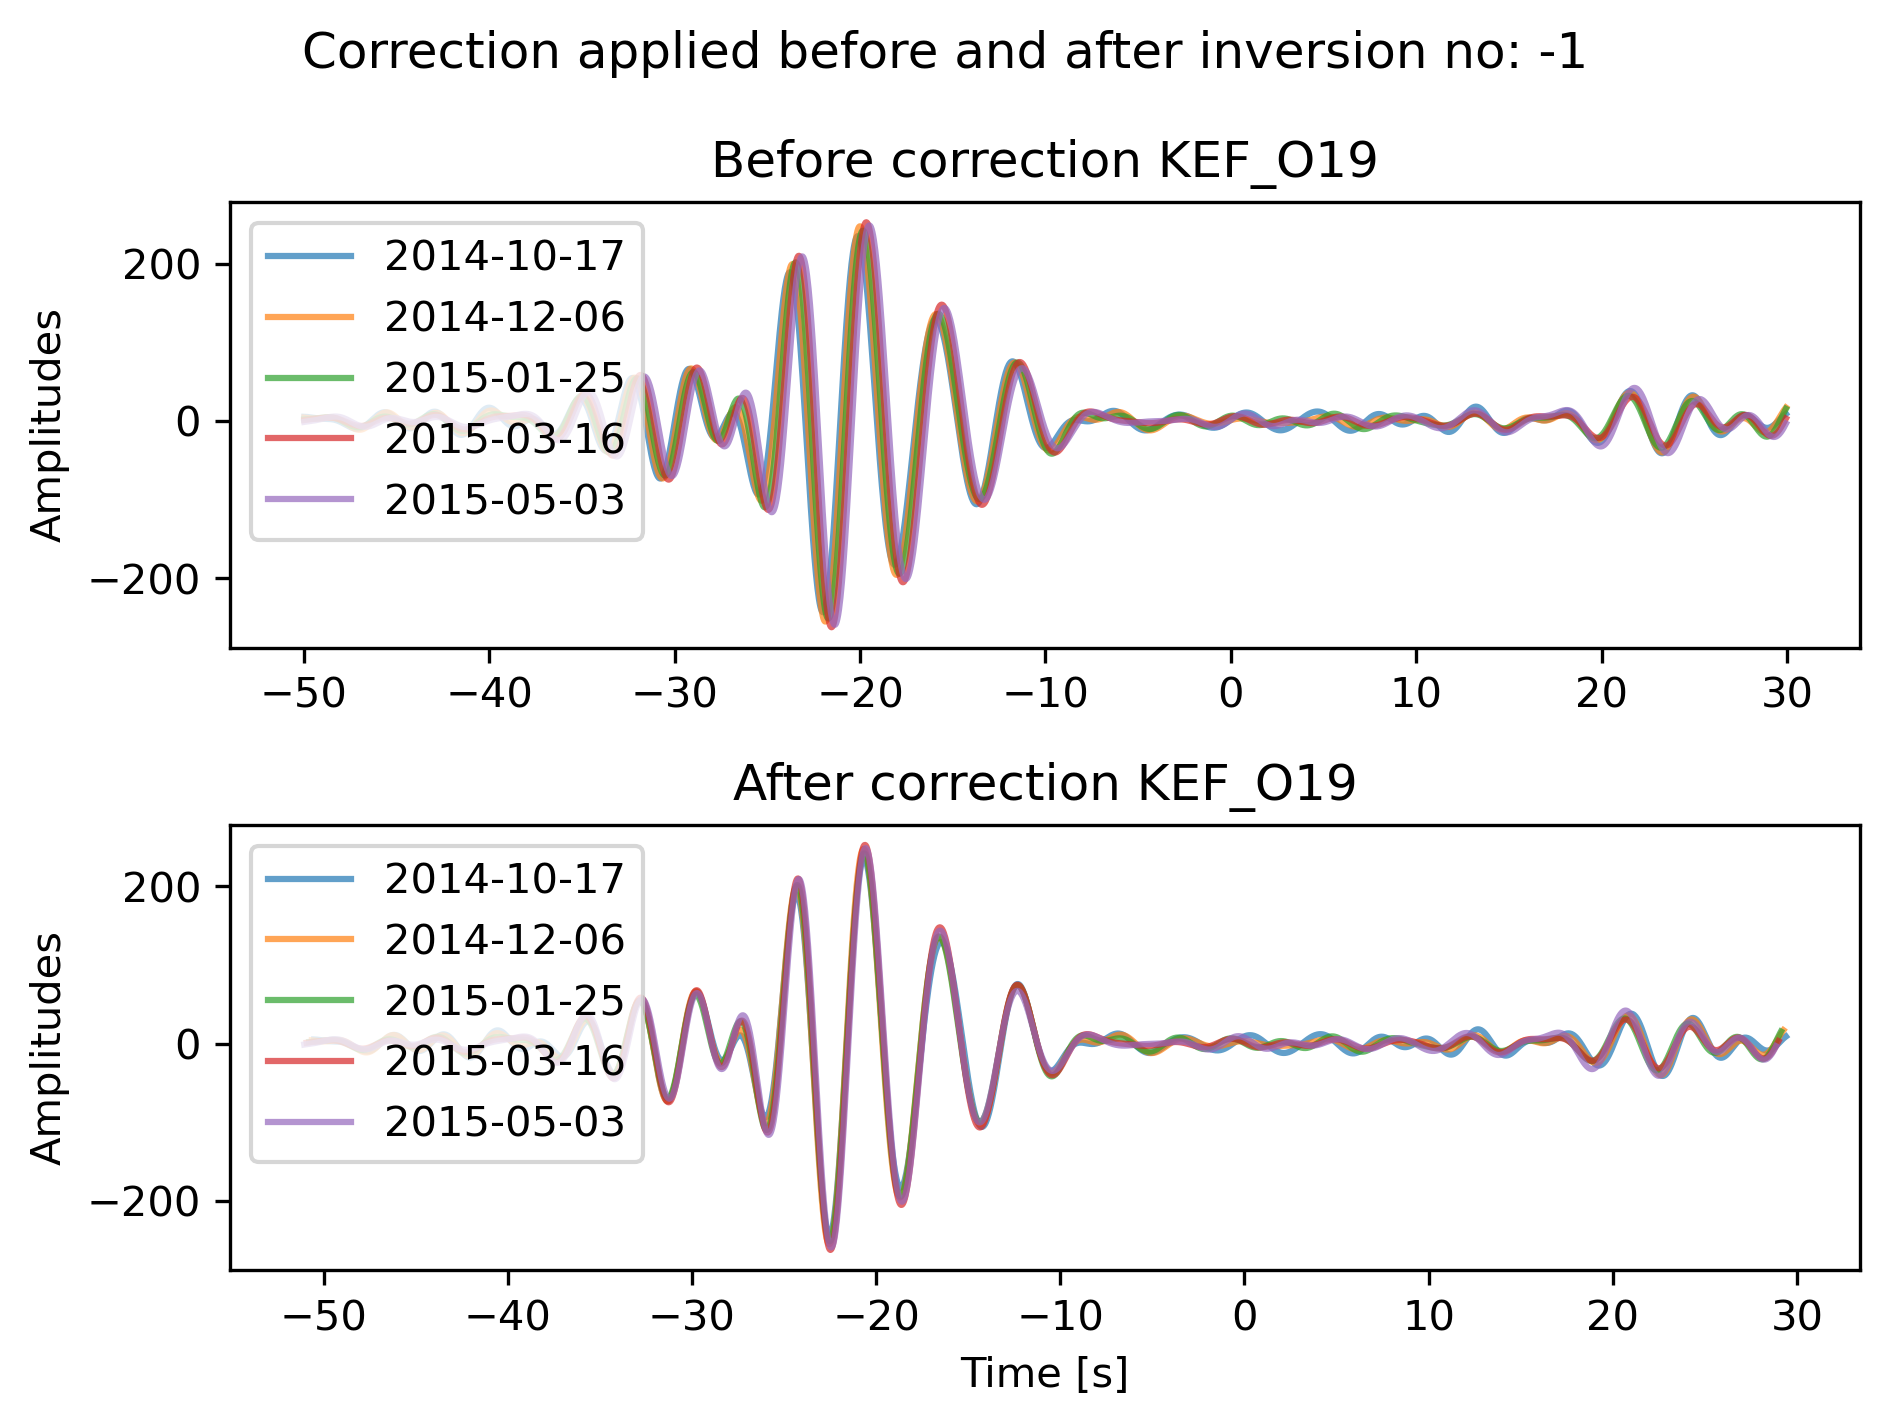

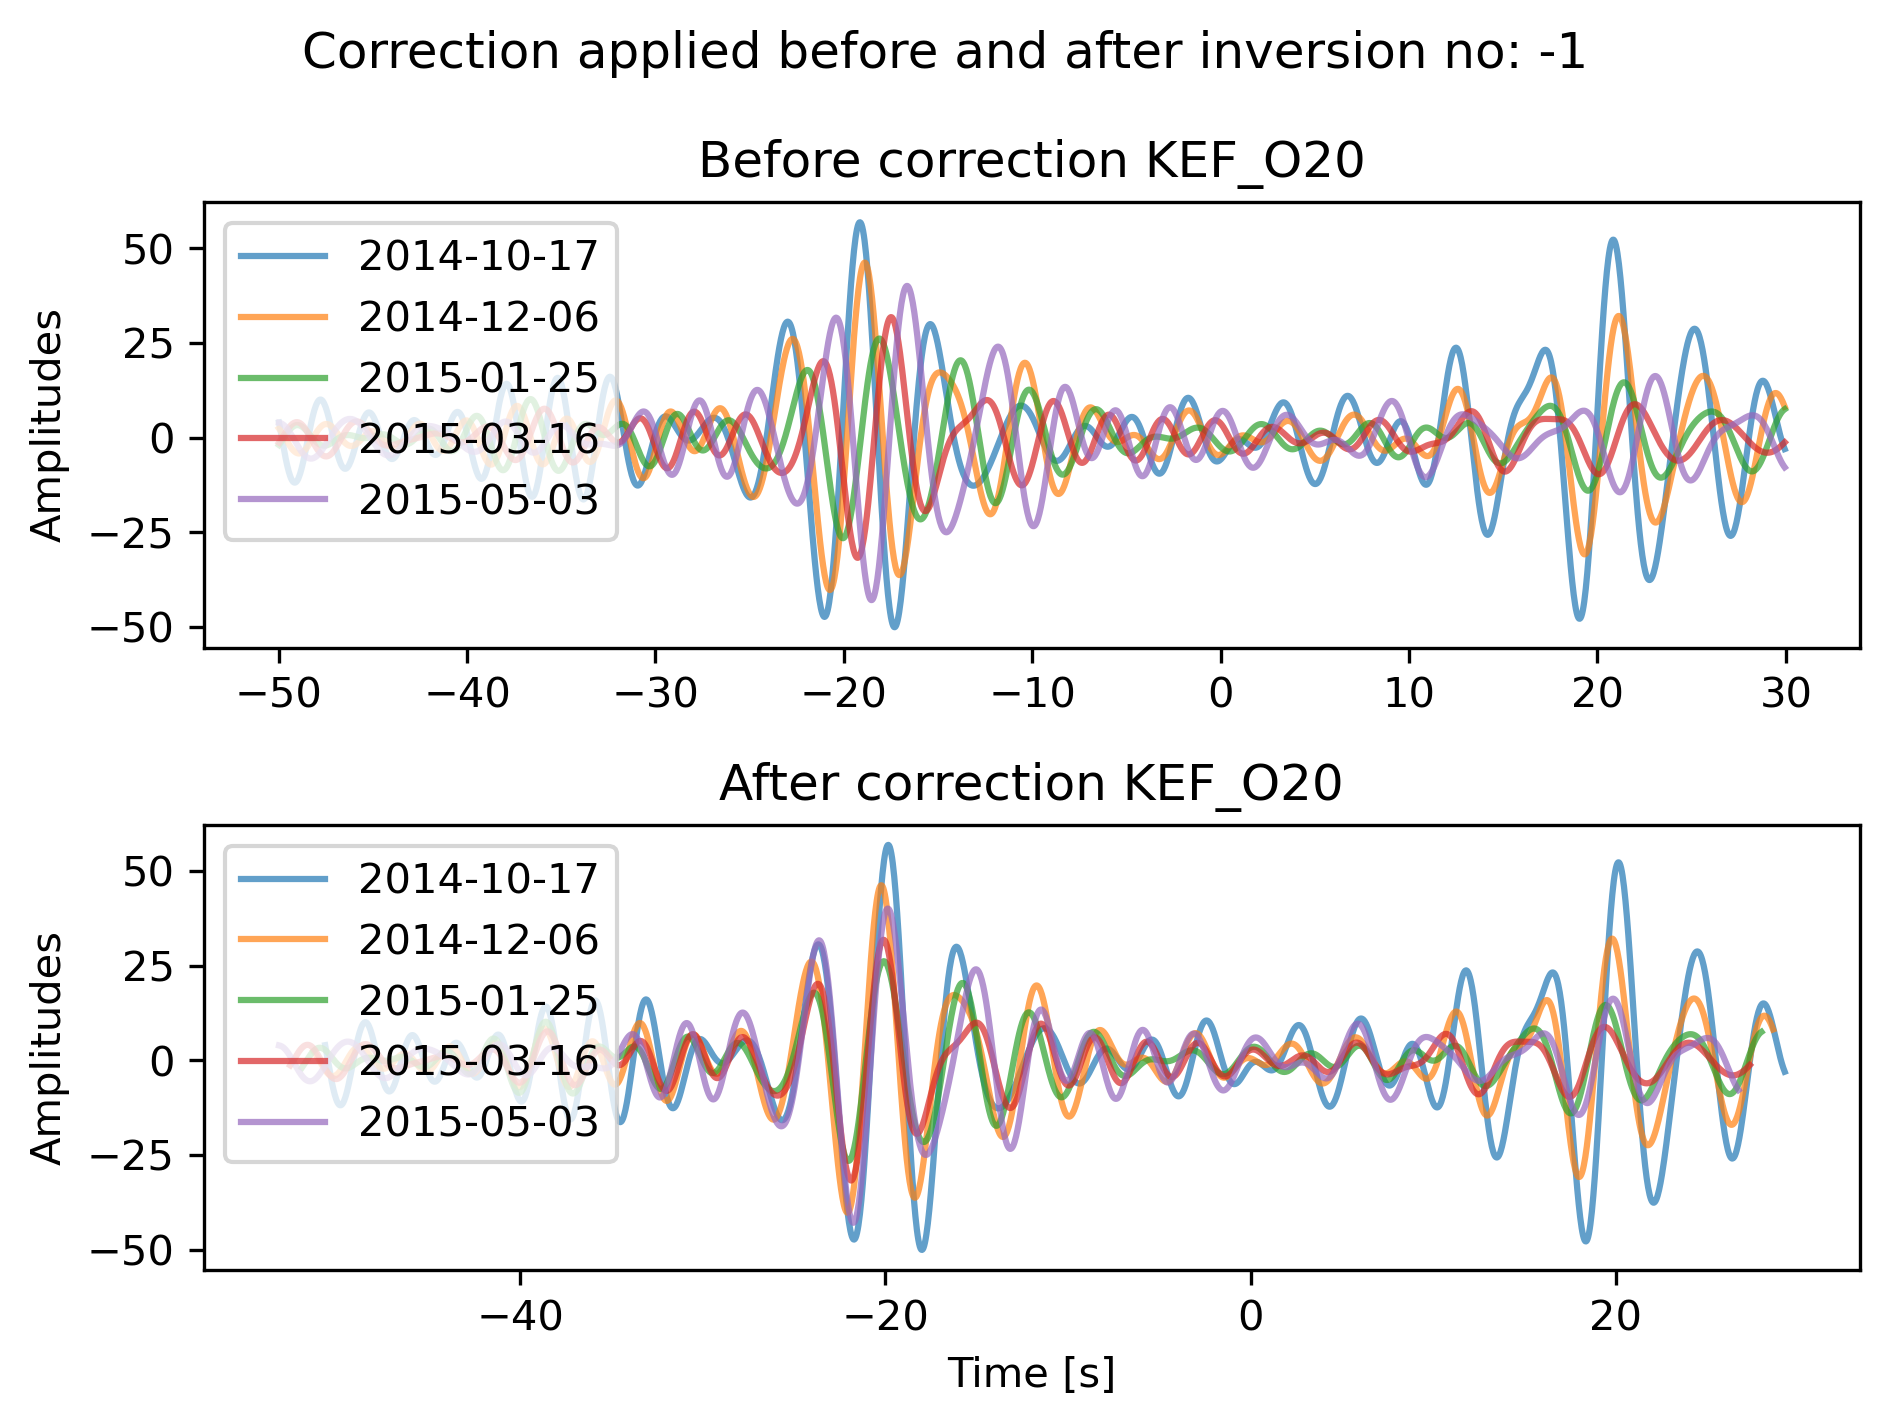

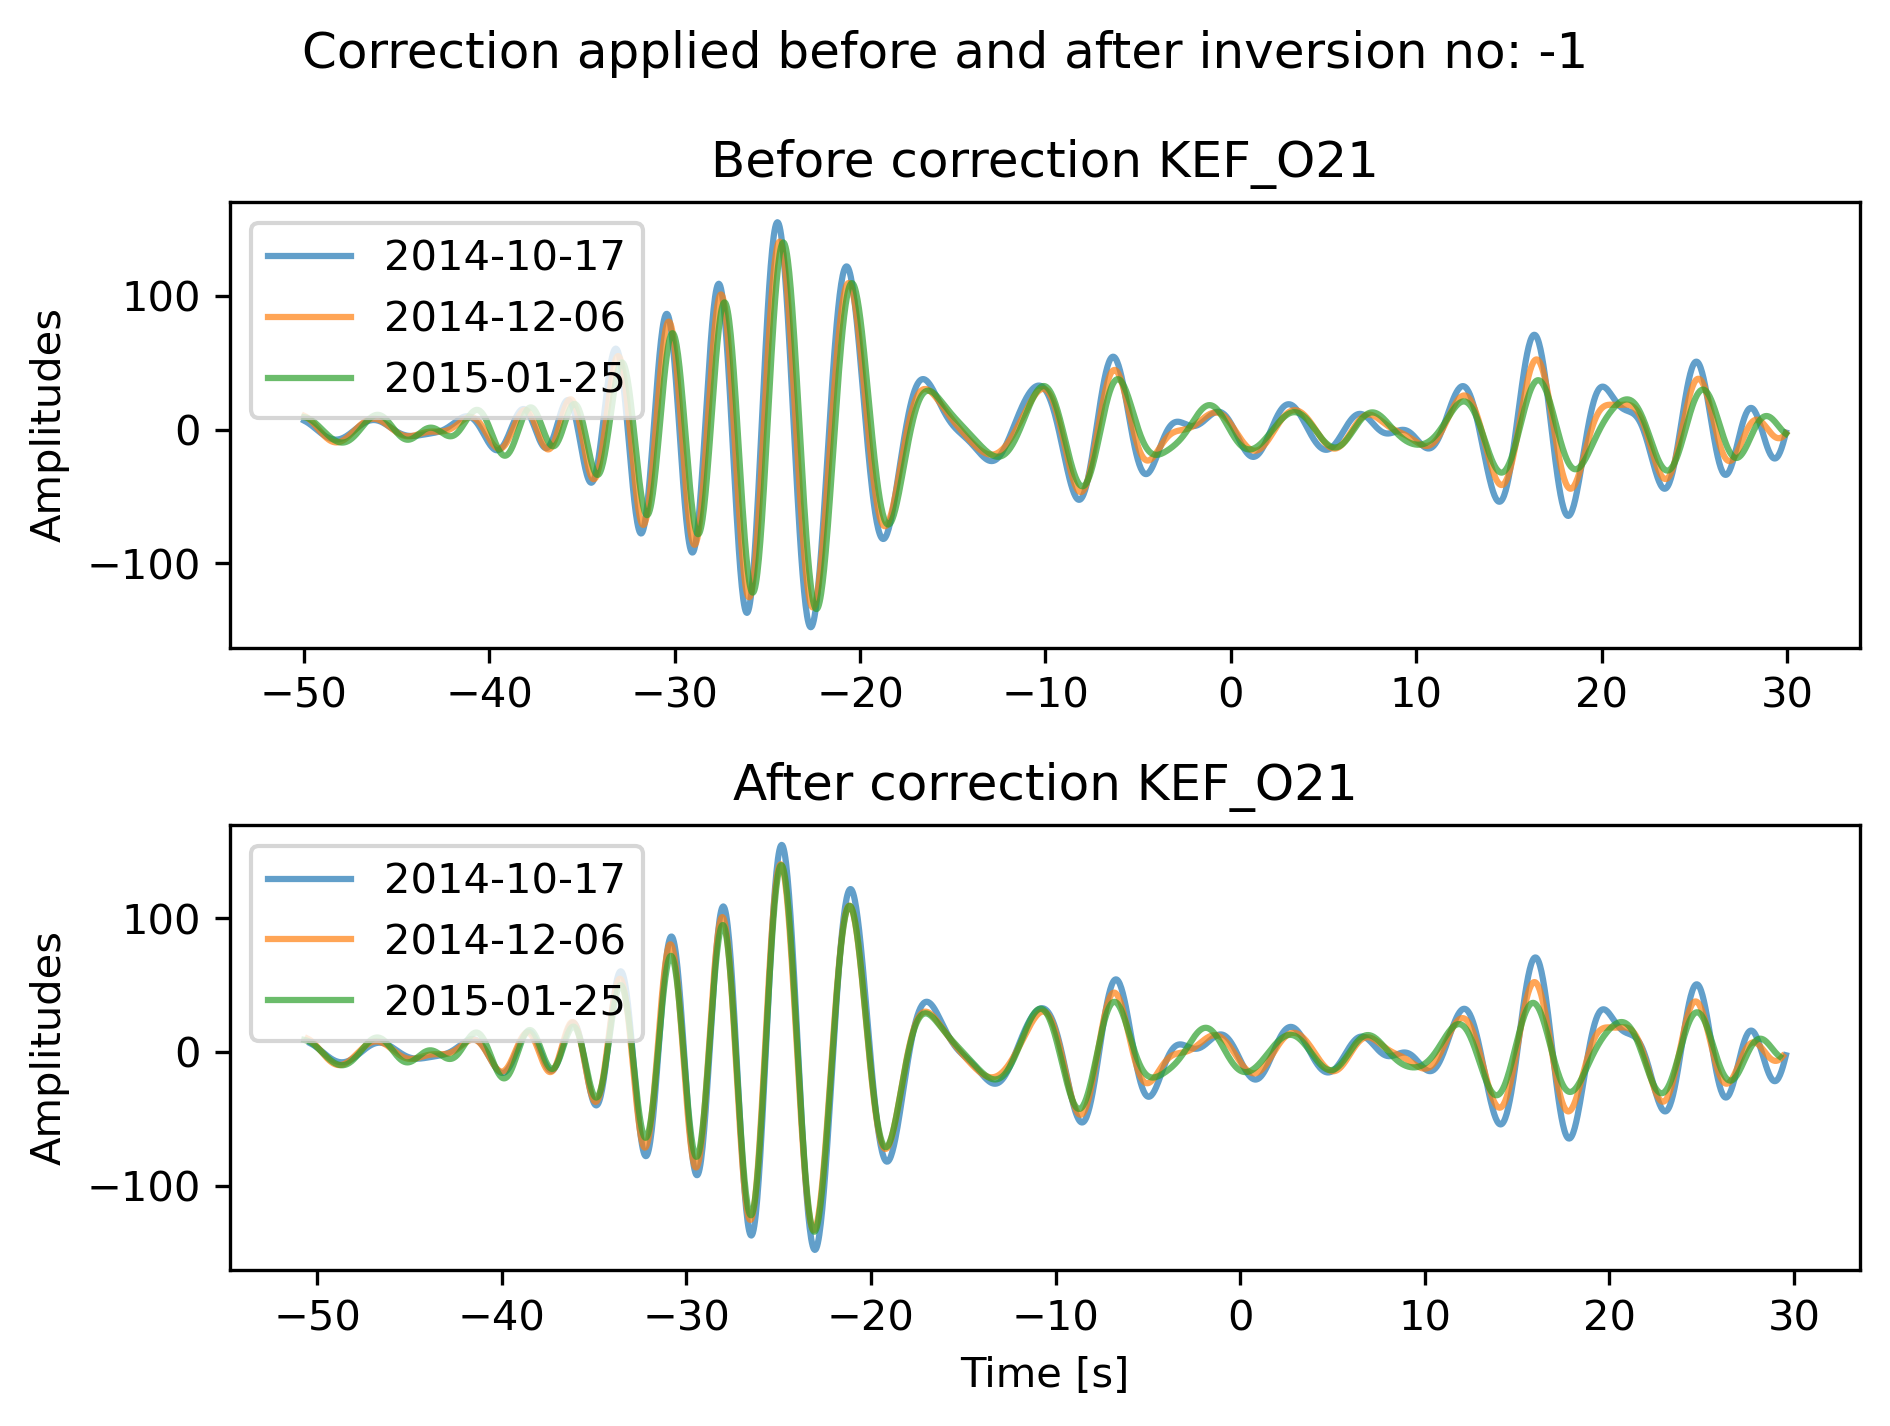

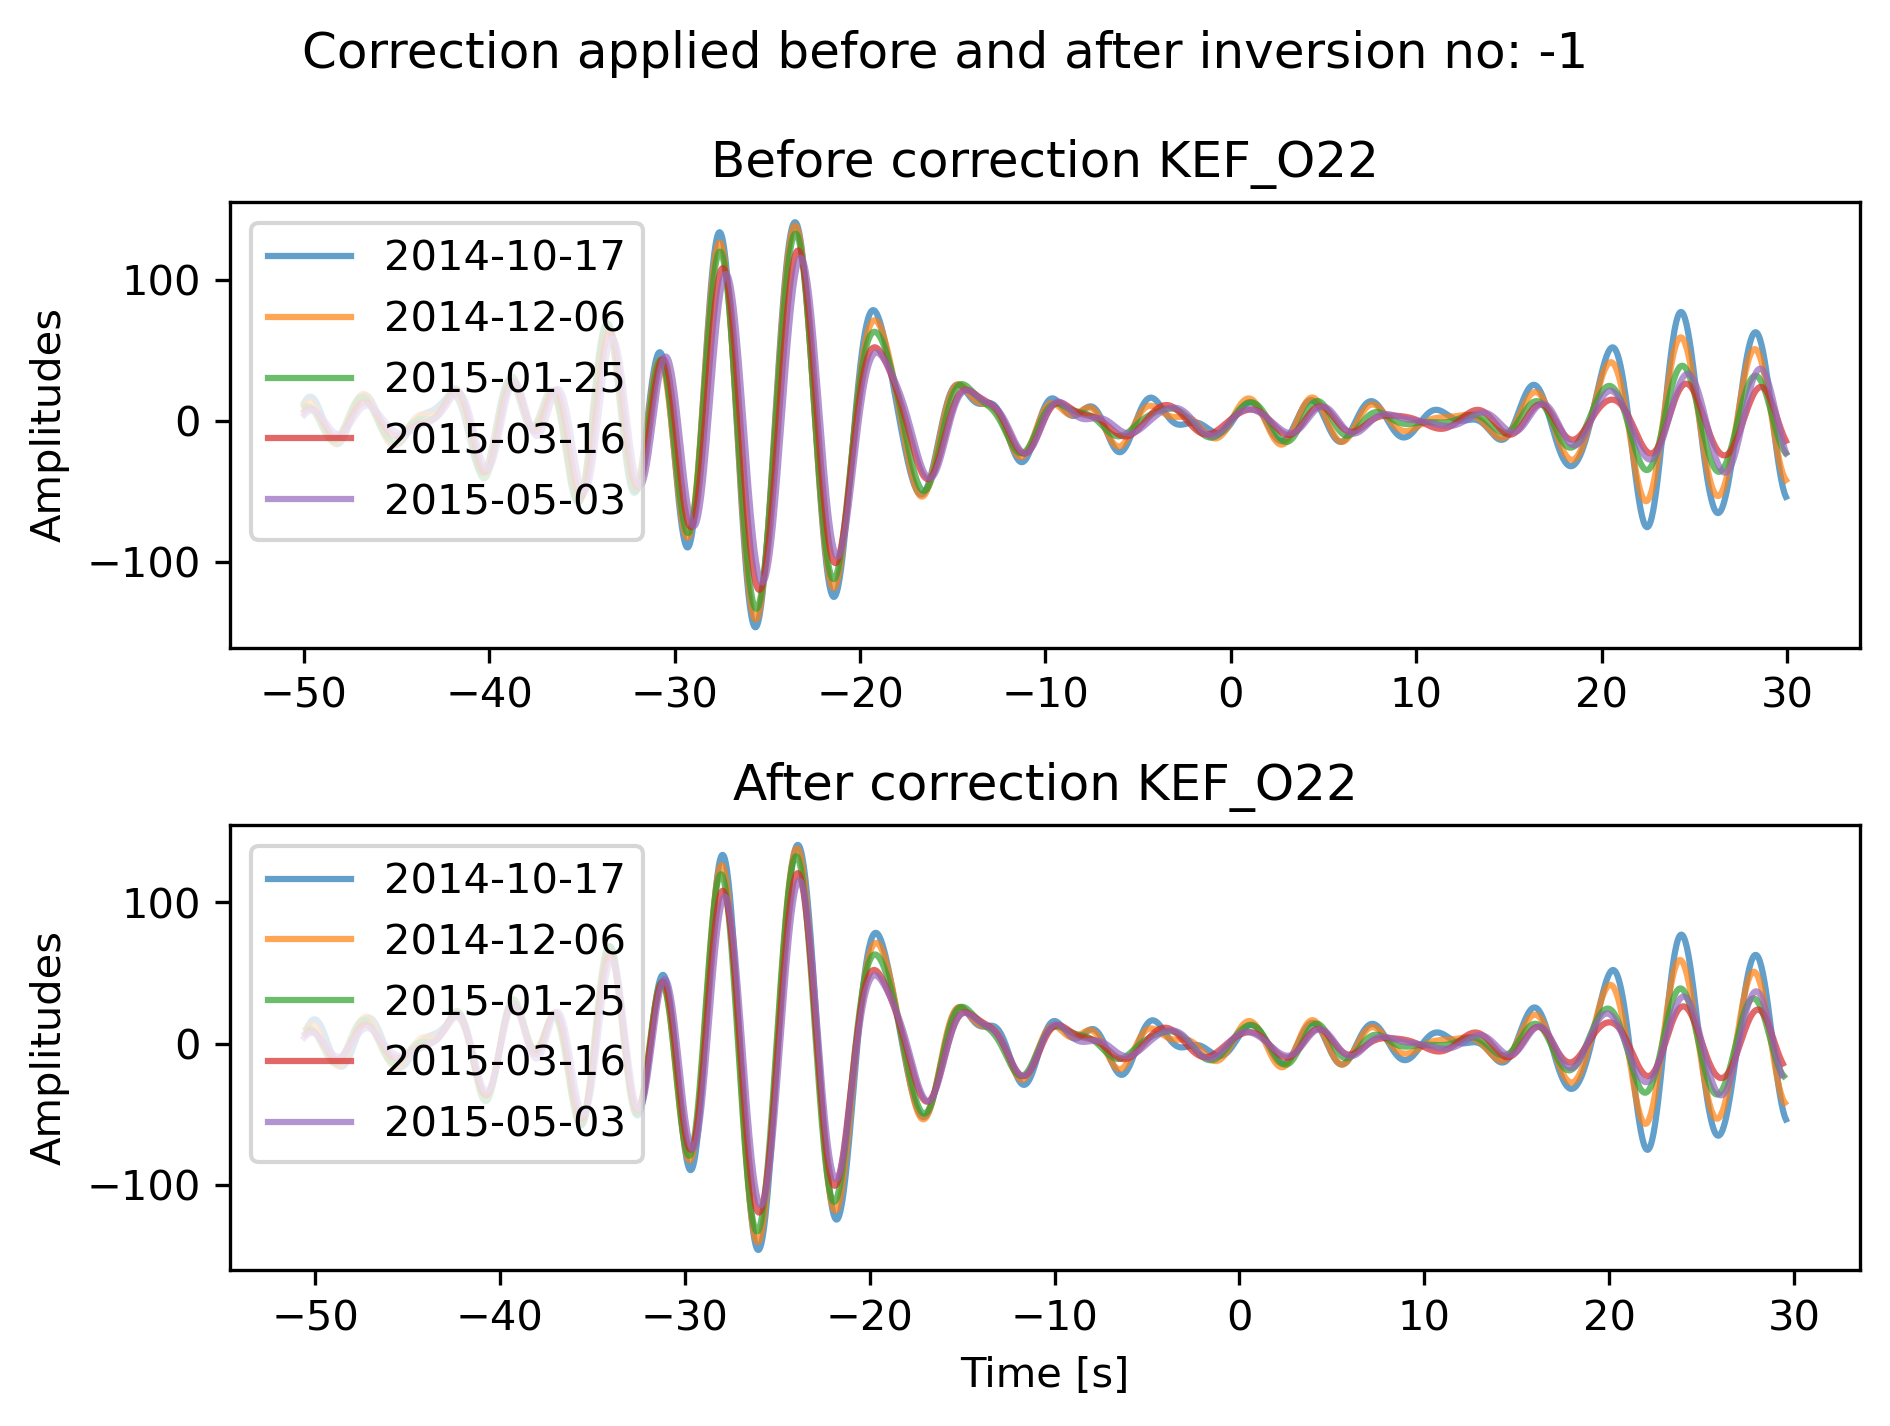

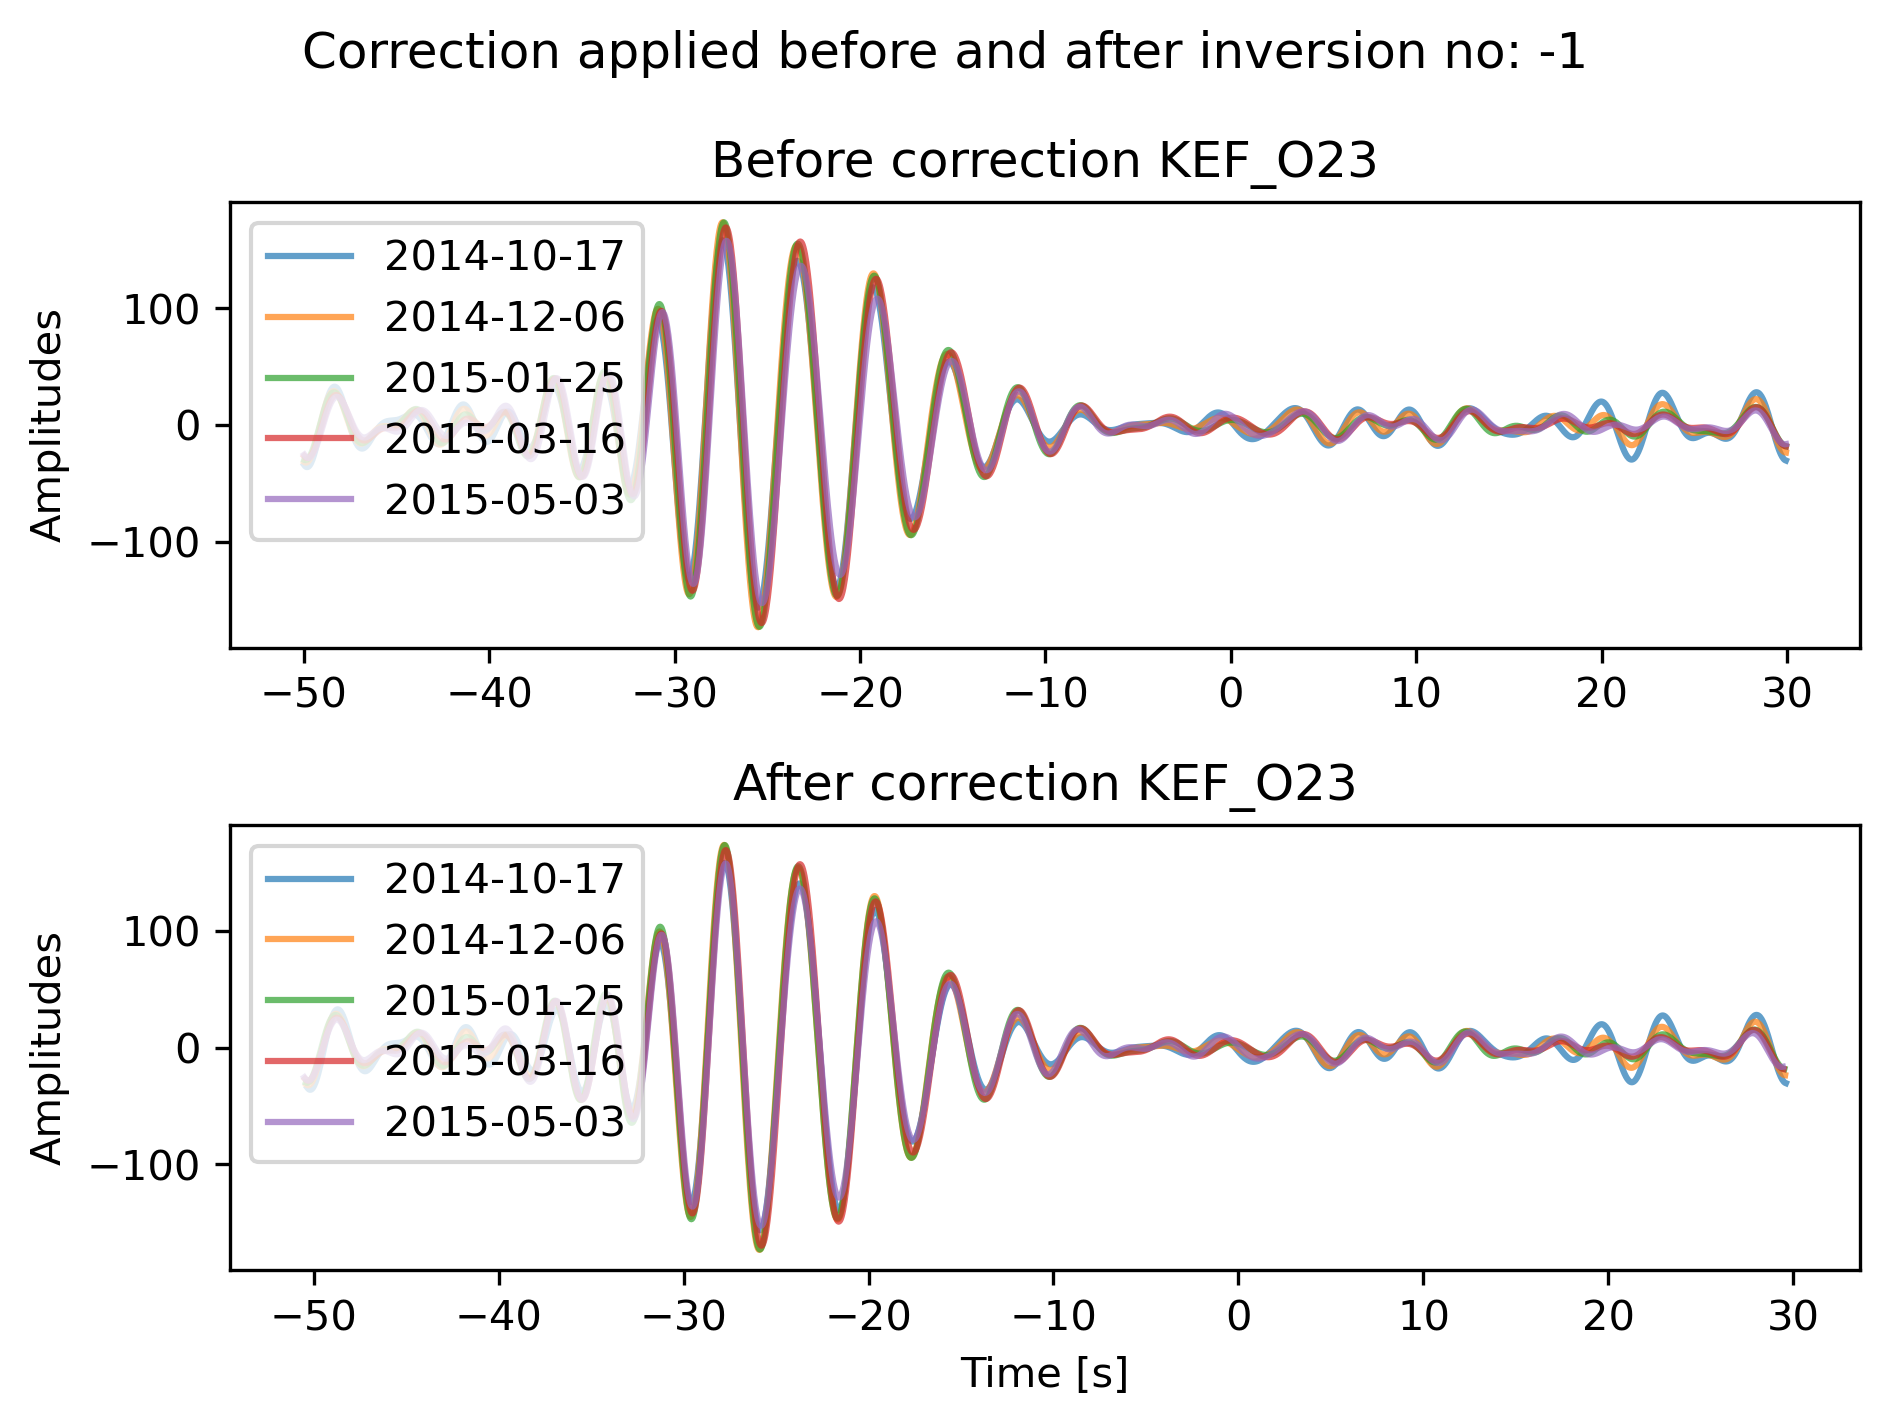

In [12]:
station1_code, station2_code = "O01", "KEF"
for sta in cd.stations:
    if sta.needs_correction:
        cd.plot_correlation_beforeNafter_correction(sta.code, station2_code)

f = open("/Users/localadmin/Dropbox/GitHub/ocloc/tutorials/bootstrap/"
         + "clockdrift.obj", "wb")
pickle.dump(cd, f)
f.close()